In [215]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [2]:
# Study data files
player_salary_path = "../NBA Kaggle/NBA_Full_Salaries_2000-2019.csv"
games_details_path = "../NBA Kaggle/games_details.csv"
games_path = "../NBA Kaggle/games.csv"

In [3]:
# Read the player salary and games details results
player_salary_df = pd.read_csv(player_salary_path)
games_details_df = pd.read_csv(games_details_path)
games_df = pd.read_csv(games_path)

In [4]:
games_details_df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,3.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,17.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,4.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,NaN,27:35,1.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,NaN,22:17,2.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [5]:
games_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,38.0,41.0,1610612761,118.0,0.461,0.897,0.263,24.0,36.0,1
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,18.0,51.0,1610612765,100.0,0.413,0.667,0.429,23.0,42.0,1


In [6]:
#Merge games_df & games_details_df to get Game Data to align with the dates the games took places
gameid_df = pd.merge(games_df, games_details_df, on= 'GAME_ID', how= 'left')
#Display table to view
gameid_df.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.9,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.9,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.9,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.9,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.9,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [7]:
#Create Year column to merge salary df on
gameid_df['Year'] = gameid_df['SEASON']+1
#Need to drop columns due to storage error when merging next DF
gameid_df.drop(columns = ['GAME_STATUS_TEXT','HOME_TEAM_ID','VISITOR_TEAM_ID','TEAM_ID_home','COMMENT','FG_PCT_home','FT_PCT_home','FG3_PCT_home','AST_home','REB_home','FG_PCT_away','FT_PCT_away','FG3_PCT_away','AST_away','REB_away','PTS_home','PTS_away','PLAYER_ID','GAME_ID','TEAM_ID_away','HOME_TEAM_WINS','TEAM_ID',], inplace = True)

In [8]:
#Drop NA to clean up dataset
gameid_df.dropna(inplace = True)
#Rename Column ['PLAYER_NAME'] to ['Name'] to match salary_df merges
gameid_df.rename(columns = {'PLAYER_NAME': 'Name'}, inplace = True)
gameid_df.head()

,GAME_DATE_EST,SEASON,TEAM_ABBREVIATION,TEAM_CITY,Name,START_POSITION,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,Year
0,2020-03-01,2019,MIL,Milwaukee,Wesley Matthews,F,27:08,3.0,11.0,0.273,...,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0,2020
1,2020-03-01,2019,MIL,Milwaukee,Giannis Antetokounmpo,F,34:55,17.0,28.0,0.607,...,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0,2020
2,2020-03-01,2019,MIL,Milwaukee,Brook Lopez,C,26:25,4.0,11.0,0.364,...,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0,2020
3,2020-03-01,2019,MIL,Milwaukee,Donte DiVincenzo,G,27:35,1.0,5.0,0.200,...,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0,2020
4,2020-03-01,2019,MIL,Milwaukee,Eric Bledsoe,G,22:17,2.0,8.0,0.250,...,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0,2020


In [9]:
#Breakdown player statistics data frame by year to be used later
player_stats_2019 = gameid_df[(gameid_df['GAME_DATE_EST'] >= '2018-10-16') & (gameid_df['GAME_DATE_EST'] <= '2019-04-10')]
player_stats_2018 = gameid_df[(gameid_df['GAME_DATE_EST'] >= '2017-10-17') & (gameid_df['GAME_DATE_EST'] <= '2018-04-11')]
player_stats_2017 = gameid_df[(gameid_df['GAME_DATE_EST'] >= '2016-10-25') & (gameid_df['GAME_DATE_EST'] <= '2017-04-12')]
player_stats_2016 = gameid_df[(gameid_df['GAME_DATE_EST'] >= '2015-10-27') & (gameid_df['GAME_DATE_EST'] <= '2016-04-13')]
player_stats_2015 = gameid_df[(gameid_df['GAME_DATE_EST'] >= '2014-10-28') & (gameid_df['GAME_DATE_EST'] <= '2015-04-15')]
player_stats_2014 = gameid_df[(gameid_df['GAME_DATE_EST'] >= '2013-10-29') & (gameid_df['GAME_DATE_EST'] <= '2014-04-16')]
player_stats_2013 = gameid_df[(gameid_df['GAME_DATE_EST'] >= '2012-10-30') & (gameid_df['GAME_DATE_EST'] <= '2013-04-17')]
player_stats_2012 = gameid_df[(gameid_df['GAME_DATE_EST'] >= '2011-12-25') & (gameid_df['GAME_DATE_EST'] <= '2012-04-26')]
player_stats_2011 = gameid_df[(gameid_df['GAME_DATE_EST'] >= '2010-10-26') & (gameid_df['GAME_DATE_EST'] <= '2011-04-13')]
player_stats_2010 = gameid_df[(gameid_df['GAME_DATE_EST'] >= '2009-10-27') & (gameid_df['GAME_DATE_EST'] <= '2010-04-14')]

In [10]:
#Merge all salary & stat df's for the past 10 years (separated to solve memory issue)
salarystats_2019 =pd.merge(player_stats_2019, player_salary_df, how= 'left', on= ['Year','Name'])
salarystats_2018 =pd.merge(player_stats_2018, player_salary_df, how= 'left', on= ['Year','Name'])
salarystats_2017 =pd.merge(player_stats_2017, player_salary_df, how= 'left', on= ['Year','Name'])
salarystats_2016 =pd.merge(player_stats_2016, player_salary_df, how= 'left', on= ['Year','Name'])
salarystats_2015 =pd.merge(player_stats_2015, player_salary_df, how= 'left', on= ['Year','Name'])
salarystats_2014 =pd.merge(player_stats_2014, player_salary_df, how= 'left', on= ['Year','Name'])
salarystats_2013 =pd.merge(player_stats_2013, player_salary_df, how= 'left', on= ['Year','Name'])
salarystats_2012 =pd.merge(player_stats_2012, player_salary_df, how= 'left', on= ['Year','Name'])
salarystats_2011 =pd.merge(player_stats_2011, player_salary_df, how= 'left', on= ['Year','Name'])
salarystats_2010 =pd.merge(player_stats_2010, player_salary_df, how= 'left', on= ['Year','Name'])
salarystats_2010.head()

,GAME_DATE_EST,SEASON,TEAM_ABBREVIATION,TEAM_CITY,Name,START_POSITION,MIN,FGM,FGA,FG_PCT,...,STL,BLK,TO,PF,PTS,PLUS_MINUS,Year,Unnamed: 0,Salaries,Rank
0,2010-04-14,2009,CLE,Cleveland,Jawad Williams,F,34:15,1.0,6.0,0.167,...,1.0,0.0,1.0,1.0,4.0,-13.0,2010,19738.0,736420.0,408.0
1,2010-04-14,2009,CLE,Cleveland,Antawn Jamison,F,16:34,2.0,5.0,0.400,...,0.0,0.0,0.0,1.0,7.0,-3.0,2010,18796.0,11641095.0,45.0
2,2010-04-14,2009,CLE,Cleveland,JJ Hickson,C,30:57,6.0,12.0,0.500,...,0.0,0.0,2.0,1.0,14.0,-14.0,2010,19705.0,1429200.0,315.0
3,2010-04-14,2009,CLE,Cleveland,Anthony Parker,G,24:54,3.0,5.0,0.600,...,1.0,0.0,0.0,0.0,8.0,-20.0,2010,19530.0,2644230.0,239.0
4,2010-04-14,2009,CLE,Cleveland,Delonte West,G,24:54,2.0,7.0,0.286,...,3.0,1.0,5.0,3.0,6.0,-20.0,2010,19400.0,4254250.0,174.0


In [11]:
#Assist to Salary Analysis
namegroup_2010 = salarystats_2010.groupby(["Name","Salaries"])
#Create APG DF
apg_2010 = namegroup_2010["AST"].mean().reset_index(name='APG')
# Pull Top 5 Salaries & Top 5 APG for 2010
top5_apg2010 = apg_2010.nlargest(5,['APG'])
top5_apg2010.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
295,Steve Nash,"$13,125,000.00",11.01
62,Chris Paul,"$13,520,500.00",10.67
92,Deron Williams,"$12,323,900.00",10.50
251,Rajon Rondo,"$2,094,922.00",9.80
82,Darren Collison,"$1,266,120.00",9.05


In [12]:
#Top 5 player Salaries for that year
top5_salary2010 = apg_2010.nlargest(5,['Salaries'])
top5_salary2010.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
307,Tracy McGrady,"$23,239,562.00",3.88
192,Kobe Bryant,"$23,034,375.00",5.00
158,Jermaine O'Neal,"$23,016,000.00",1.31
302,Tim Duncan,"$22,183,220.00",3.18
285,Shaquille O'Neal,"$20,000,000.00",1.51


Correlation Coefficient: 0.22


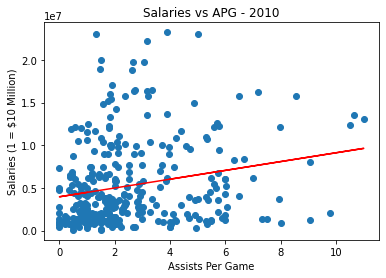

In [13]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = apg_2010['APG']
y_values = apg_2010['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs APG - 2010')
plt.xlabel('Assists Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(apg_2010['APG'], apg_2010['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [14]:
#Assist to Salary Analysis
namegroup_2011 = salarystats_2011.groupby(["Name","Salaries"])
#Create APG DF
apg_2011 = namegroup_2011["AST"].mean().reset_index(name='APG')
# Pull Top 5 Salaries & Top 5 APG for 2011
top5_apg2011 = apg_2011.nlargest(5,['APG'])
top5_apg2011.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
293,Steve Nash,"$10,310,938.00",11.40
252,Rajon Rondo,"$9,090,911.00",11.18
88,Deron Williams,"$14,940,152.00",10.26
60,Chris Paul,"$14,940,153.00",9.78
175,Jose Calderon,"$9,000,000.00",9.73


In [15]:
#Top 5 player Salaries for that year
top5_salary2011 = apg_2011.nlargest(5,['Salaries'])
top5_salary2011.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
192,Kobe Bryant,"$24,806,250.00",4.73
255,Rashard Lewis,"$19,573,711.00",1.71
186,Kevin Garnett,"$18,800,000.00",2.41
299,Tim Duncan,"$18,700,000.00",2.67
15,Andrei Kirilenko,"$17,823,000.00",3.03


Correlation Coefficient: 0.27


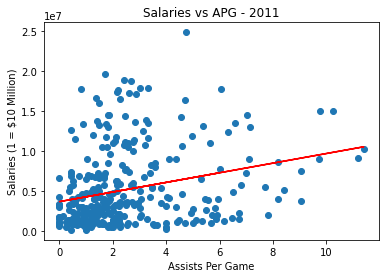

In [16]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = apg_2011['APG']
y_values = apg_2011['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs APG - 2011')
plt.xlabel('Assists Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(apg_2011['APG'], apg_2011['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [17]:
#Assist to Salary Analysis
namegroup_2012 = salarystats_2012.groupby(["Name","Salaries"])
#Create APG DF
apg_2012 = namegroup_2012["AST"].mean().reset_index(name='APG')
# Pull Top 5 Salaries & Top 5 APG for 2012
top5_apg2012 = apg_2012.nlargest(5,['APG'])
top5_apg2012.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
141,Jamaal Tinsley,"$1,229,255.00",13.00
271,Rajon Rondo,"$10,045,455.00",11.70
310,Steve Nash,"$11,689,062.00",10.71
11,Andre Miller,"$7,807,728.00",10.14
53,Chris Paul,"$16,359,805.00",9.05


In [18]:
#Top 5 player Salaries for that year
top5_salary2012 = apg_2012.nlargest(5,['Salaries'])
top5_salary2012.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
203,Kobe Bryant,"$25,244,493.00",4.55
333,Vince Carter,"$21,300,000.00",2.30
196,Kevin Garnett,"$21,247,044.00",2.92
317,Tim Duncan,"$21,164,619.00",2.28
274,Rashard Lewis,"$21,136,631.00",1.00


Correlation Coefficient: 0.2


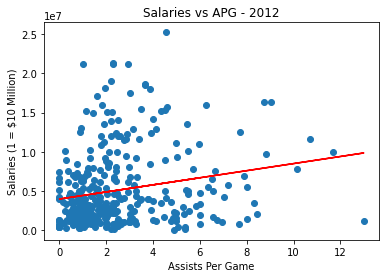

In [19]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = apg_2012['APG']
y_values = apg_2012['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs APG - 2012')
plt.xlabel('Assists Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(apg_2012['APG'], apg_2012['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [20]:
#Assist to Salary Analysis
namegroup_2013 = salarystats_2013.groupby(["Name","Salaries"])
#Create APG DF
apg_2013 = namegroup_2013["AST"].mean().reset_index(name='APG')
# Pull Top 5 Salaries & Top 5 APG for 2013
top5_apg2013 = apg_2013.nlargest(5,['APG'])
top5_apg2013.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
190,Kendall Marshall,"$1,919,160.00",12.33
270,Rajon Rondo,"$11,000,000.00",11.05
38,Brian Roberts,"$473,604.00",10.00
55,Chris Paul,"$17,779,457.00",9.69
128,Greivis Vasquez,"$1,191,240.00",9.03


In [21]:
#Top 5 player Salaries for that year
top5_salary2013 = apg_2013.nlargest(5,['Salaries'])
top5_salary2013.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
200,Kobe Bryant,"$27,849,000.00",6.01
36,Brandon Roy,"$21,459,805.00",4.60
92,Dirk Nowitzki,"$20,907,128.00",2.68
167,Joe Johnson,"$19,752,645.00",3.51
44,Carmelo Anthony,"$19,450,000.00",2.55


Correlation Coefficient: 0.24


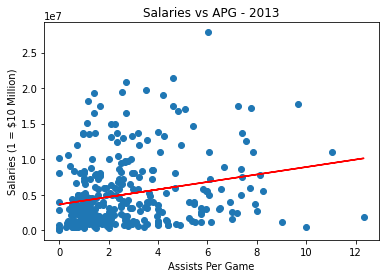

In [22]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = apg_2013['APG']
y_values = apg_2013['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs APG - 2013')
plt.xlabel('Assists Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(apg_2013['APG'], apg_2013['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [23]:
#Assist to Salary Analysis
namegroup_2014 = salarystats_2014.groupby(["Name","Salaries"])
#Create APG DF
apg_2014 = namegroup_2014["AST"].mean().reset_index(name='APG')
# Pull Top 5 Salaries & Top 5 APG for 2014
top5_apg2014 = apg_2014.nlargest(5,['APG'])
top5_apg2014.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
55,Chris Paul,"$18,668,431.00",10.69
259,Rajon Rondo,"$12,000,000.00",9.80
177,Kendall Marshall,"$547,570.00",9.53
318,Ty Lawson,"$10,786,517.00",8.85
163,John Wall,"$7,459,924.00",8.79


In [24]:
#Top 5 player Salaries for that year
top5_salary2014 = apg_2014.nlargest(5,['Salaries'])
top5_salary2014.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
191,Kobe Bryant,"$30,453,000.00",6.33
84,Dirk Nowitzki,"$22,721,381.00",2.70
45,Carmelo Anthony,"$21,490,000.00",3.14
160,Joe Johnson,"$21,466,718.00",2.73
89,Dwight Howard,"$20,513,178.00",1.85


Correlation Coefficient: 0.24


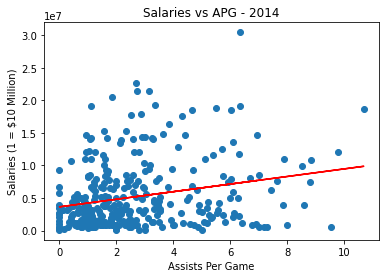

In [25]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = apg_2014['APG']
y_values = apg_2014['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs APG - 2014')
plt.xlabel('Assists Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(apg_2014['APG'], apg_2014['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [26]:
#Assist to Salary Analysis
namegroup_2015 = salarystats_2015.groupby(["Name","Salaries"])
#Create APG DF
apg_2015 = namegroup_2015["AST"].mean().reset_index(name='APG')
# Pull Top 5 Salaries & Top 5 APG for 2015
top5_apg2015 = apg_2015.nlargest(5,['APG'])
top5_apg2015.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
342,Tyler Ennis,"$1,590,720.00",11.00
62,Chris Paul,"$20,068,563.00",10.22
178,John Wall,"$13,701,250.00",10.03
341,Ty Lawson,"$11,595,506.00",9.60
304,Sebastian Telfair,"$1,316,809.00",9.00


In [27]:
#Top 5 player Salaries for that year
top5_salary2015 = apg_2015.nlargest(5,['Salaries'])
top5_salary2015.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
208,Kobe Bryant,"$23,500,000.00",5.63
172,Joe Johnson,"$23,180,790.00",3.65
52,Carmelo Anthony,"$22,458,401.00",3.05
100,Dwight Howard,"$21,436,271.00",1.22
59,Chris Bosh,"$20,644,400.00",2.16


Correlation Coefficient: 0.26


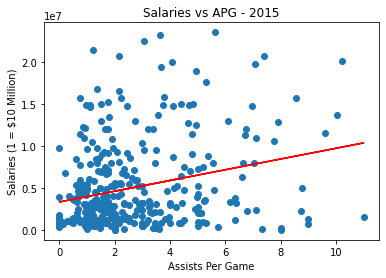

In [28]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = apg_2015['APG']
y_values = apg_2015['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs APG - 2015')
plt.xlabel('Assists Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(apg_2015['APG'], apg_2015['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [29]:
#Assist to Salary Analysis
namegroup_2016 = salarystats_2016.groupby(["Name","Salaries"])
#Create APG DF
apg_2016 = namegroup_2016["AST"].mean().reset_index(name='APG')
# Pull Top 5 Salaries & Top 5 APG for 2016
top5_apg2016 = apg_2016.nlargest(5,['APG'])
top5_apg2016.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
275,Rajon Rondo,"$9,500,000.00",11.65
296,Russell Westbrook,"$16,744,218.00",10.43
167,John Wall,"$14,728,844.00",10.25
59,Chris Paul,"$21,468,695.00",9.97
276,Ramon Sessions,"$2,170,465.00",9.60


In [30]:
#Top 5 player Salaries for that year
top5_salary2016 = apg_2016.nlargest(5,['Salaries'])
top5_salary2016.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
203,Kobe Bryant,"$25,000,000.00",2.79
219,LeBron James,"$22,970,500.00",6.76
48,Carmelo Anthony,"$22,875,000.00",4.15
95,Dwight Howard,"$22,359,364.00",1.38
163,Joe Johnson,"$22,309,344.00",3.93


Correlation Coefficient: 0.3


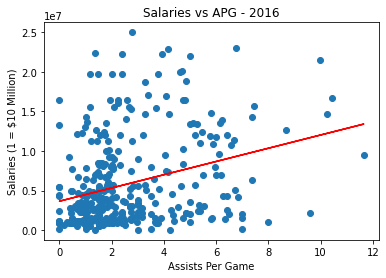

In [31]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = apg_2016['APG']
y_values = apg_2016['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs APG - 2016')
plt.xlabel('Assists Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(apg_2016['APG'], apg_2016['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [32]:
#Assist to Salary Analysis
namegroup_2017 = salarystats_2017.groupby(["Name","Salaries"])
#Create APG DF
apg_2017 = namegroup_2017["AST"].mean().reset_index(name='APG')
# Pull Top 5 Salaries & Top 5 APG for 2017
top5_apg2017 = apg_2017.nlargest(5,['APG'])
top5_apg2017.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
125,James Harden,"$26,540,100.00",11.20
151,John Wall,"$15,756,438.00",10.65
279,Russell Westbrook,"$26,540,100.00",10.37
46,Chris Paul,"$22,868,827.00",9.23
269,Ricky Rubio,"$13,400,000.00",9.09


In [33]:
#Top 5 player Salaries for that year
top5_salary2017 = apg_2017.nlargest(5,['Salaries'])
top5_salary2017.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
196,LeBron James,"$30,963,450.00",8.73
1,Al Horford,"$26,540,100.00",4.96
67,DeMar DeRozan,"$26,540,100.00",3.92
125,James Harden,"$26,540,100.00",11.20
176,Kevin Durant,"$26,540,100.00",4.84


Correlation Coefficient: 0.32


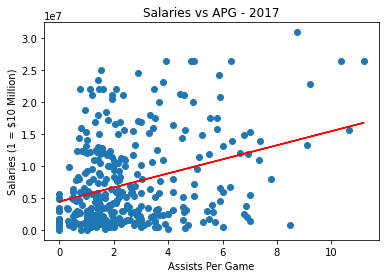

In [34]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = apg_2017['APG']
y_values = apg_2017['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs APG - 2017')
plt.xlabel('Assists Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(apg_2017['APG'], apg_2017['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [35]:
#Assist to Salary Analysis
namegroup_2018 = salarystats_2018.groupby(["Name","Salaries"])
#Create APG DF
apg_2018 = namegroup_2018["AST"].mean().reset_index(name='APG')
# Pull Top 5 Salaries & Top 5 APG for 2018
top5_apg2018 = apg_2018.nlargest(5,['APG'])
top5_apg2018.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
302,Russell Westbrook,"$28,299,399.00",10.25
173,John Wall,"$18,063,850.00",9.59
222,LeBron James,"$33,285,709.00",9.11
147,James Harden,"$28,299,399.00",8.75
285,Rajon Rondo,"$6,300,000.00",8.27


In [36]:
#Top 5 player Salaries for that year
top5_salary2018 = apg_2018.nlargest(5,['Salaries'])
top5_salary2018.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
319,Stephen Curry,"$34,682,550.00",6.08
222,LeBron James,"$33,285,709.00",9.11
279,Paul Millsap,"$30,769,231.00",2.78
125,Gordon Hayward,"$29,727,900.00",0.00
30,Blake Griffin,"$29,512,900.00",5.76


Correlation Coefficient: 0.3


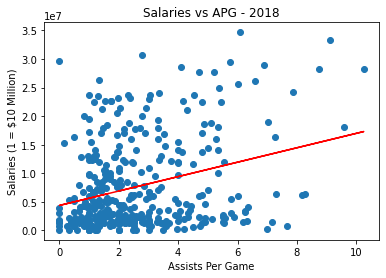

In [37]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = apg_2018['APG']
y_values = apg_2018['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs APG - 2018')
plt.xlabel('Assists Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(apg_2018['APG'], apg_2018['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [38]:
#Assist to Salary Analysis
namegroup_2019 = salarystats_2019.groupby(["Name","Salaries"])
#Create APG DF
apg_2019 = namegroup_2019["AST"].mean().reset_index(name='APG')
# Pull Top 5 Salaries & Top 5 APG for 2019
top5_apg2019 = apg_2019.nlargest(5,['APG'])
top5_apg2019.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
64,Dante Exum,"$10,600,000.00",13.00
283,Russell Westbrook,"$35,665,000.00",10.74
267,Rajon Rondo,"$9,000,000.00",9.38
16,Anfernee Simons,"$1,837,800.00",9.00
6,Alex Caruso,"$77,250.00",8.75


In [39]:
#Top 5 player Salaries for that year
top5_salary2019 = apg_2019.nlargest(5,['Salaries'])
top5_salary2019.style.format({"Salaries":"${:,.2f}" , "APG":"{:,.2f}"})

,Name,Salaries,APG
300,Stephen Curry,"$37,457,154.00",5.23
283,Russell Westbrook,"$35,665,000.00",10.74
48,Chris Paul,"$35,654,150.00",8.16
216,LeBron James,"$35,654,150.00",8.25
26,Blake Griffin,"$31,873,932.00",5.36


Correlation Coefficient: 0.3


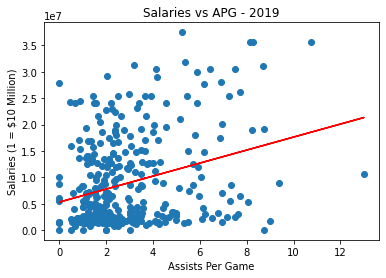

In [40]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = apg_2019['APG']
y_values = apg_2019['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs APG - 2019')
plt.xlabel('Assists Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(apg_2019['APG'], apg_2019['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

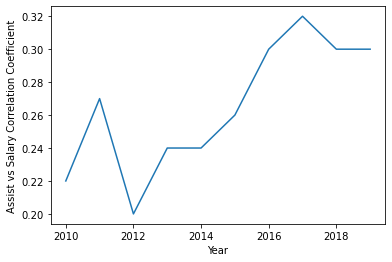

In [41]:
x_axis =[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y_axis = [.22, .27, .2, .24, .24, .26, .30, .32, .3, .3]
plt.plot(x_axis,y_axis)
plt.xlabel("Year")
plt.ylabel("Assist vs Salary Correlation Coefficient")
plt.show()

In [42]:
###PPPPPPPPPP###
###OOOOOOOOOO###
###IIIIIIIIII###
###NNNNNNNNNN###
###TTTTTTTTTT###
###SSSSSSSSSS###

In [43]:
#Points to Salary Analysis
namegroup_2010 = salarystats_2010.groupby(["Name","Salaries"])
#Create APG DF
ppg_2010 = namegroup_2010["PTS"].mean().reset_index(name='PPG')
# Pull Top 5 Salaries & Top 5 APG for 2010
top5_ppg2010 = ppg_2010.nlargest(5,['PPG'])
top5_ppg2010.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
186,Kevin Durant,"$4,796,880.00",30.15
199,LeBron James,"$15,779,912.00",29.71
49,Carmelo Anthony,"$15,779,912.00",28.16
192,Kobe Bryant,"$23,034,375.00",26.99
104,Dwyane Wade,"$15,779,912.00",26.56


In [44]:
#Top 5 player Salaries for that year
top5_salary2010 = ppg_2010.nlargest(5,['Salaries'])
top5_salary2010.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
307,Tracy McGrady,"$23,239,562.00",9.42
192,Kobe Bryant,"$23,034,375.00",26.99
158,Jermaine O'Neal,"$23,016,000.00",13.57
302,Tim Duncan,"$22,183,220.00",17.84
285,Shaquille O'Neal,"$20,000,000.00",12.00


Correlation Coefficient: 0.44


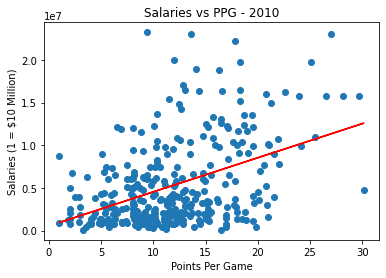

In [45]:
# Plot the linear regression model on top of the scatter plot
#Define X & Y values
x_values = ppg_2010['PPG']
y_values = ppg_2010['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs PPG - 2010')
plt.xlabel('Points Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(ppg_2010['PPG'], ppg_2010['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [46]:
#Points to Salary Analysis
namegroup_2011 = salarystats_2011.groupby(["Name","Salaries"])
#Create APG DF
ppg_2011 = namegroup_2011["PTS"].mean().reset_index(name='PPG')
# Pull Top 5 Salaries & Top 5 APG for 2011
top5_ppg2011 = ppg_2011.nlargest(5,['PPG'])
top5_ppg2011.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
103,Eddie House,"$1,352,181.00",35.00
185,Kevin Durant,"$6,053,663.00",27.71
203,LeBron James,"$14,500,000.00",26.72
48,Carmelo Anthony,"$17,149,243.00",25.58
99,Dwyane Wade,"$14,200,000.00",25.54


In [47]:
#Top 5 player Salaries for that year
top5_salary2011 = ppg_2011.nlargest(5,['Salaries'])
top5_salary2011.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
192,Kobe Bryant,"$24,806,250.00",25.34
255,Rashard Lewis,"$19,573,711.00",12.58
186,Kevin Garnett,"$18,800,000.00",14.87
299,Tim Duncan,"$18,700,000.00",13.45
15,Andrei Kirilenko,"$17,823,000.00",11.76


Correlation Coefficient: 0.43


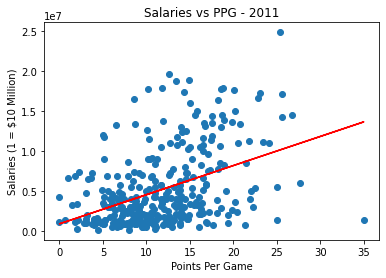

In [48]:
# Plot the linear regression model on top of the scatter plot
#Define X & Y values
x_values = ppg_2011['PPG']
y_values = ppg_2011['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs PPG - 2011')
plt.xlabel('Points Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(ppg_2011['PPG'], ppg_2011['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [49]:
#Points to Salary Analysis
namegroup_2012 = salarystats_2012.groupby(["Name","Salaries"])
#Create APG DF
ppg_2012 = namegroup_2012["PTS"].mean().reset_index(name='PPG')
# Pull Top 5 Salaries & Top 5 APG for 2012
top5_ppg2012 = ppg_2012.nlargest(5,['PPG'])
top5_ppg2012.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
195,Kevin Durant,"$15,506,632.00",28.03
203,Kobe Bryant,"$25,244,493.00",27.86
217,LeBron James,"$16,022,500.00",27.15
197,Kevin Love,"$4,609,701.00",26.04
56,Chris Wright,"$473,604.00",25.00


In [50]:
#Top 5 player Salaries for that year
top5_salary2012 = ppg_2012.nlargest(5,['Salaries'])
top5_salary2012.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
203,Kobe Bryant,"$25,244,493.00",27.86
333,Vince Carter,"$21,300,000.00",9.70
196,Kevin Garnett,"$21,247,044.00",15.78
317,Tim Duncan,"$21,164,619.00",15.43
274,Rashard Lewis,"$21,136,631.00",8.60


Correlation Coefficient: 0.46


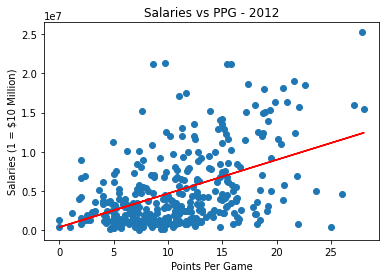

In [51]:
# Plot the linear regression model on top of the scatter plot
#Define X & Y values
x_values = ppg_2012['PPG']
y_values = ppg_2012['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs PPG - 2012')
plt.xlabel('Points Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(ppg_2012['PPG'], ppg_2012['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [52]:
#Points to Salary Analysis
namegroup_2013 = salarystats_2013.groupby(["Name","Salaries"])
#Create APG DF
ppg_2013 = namegroup_2013["PTS"].mean().reset_index(name='PPG')
# Pull Top 5 Salaries & Top 5 APG for 2013
top5_ppg2013 = ppg_2013.nlargest(5,['PPG'])
top5_ppg2013.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
44,Carmelo Anthony,"$19,450,000.00",28.66
194,Kevin Durant,"$17,548,838.00",28.15
200,Kobe Bryant,"$27,849,000.00",27.35
217,LeBron James,"$17,545,000.00",26.79
143,James Harden,"$5,820,416.00",25.94


In [53]:
#Top 5 player Salaries for that year
top5_salary2013 = ppg_2013.nlargest(5,['Salaries'])
top5_salary2013.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
200,Kobe Bryant,"$27,849,000.00",27.35
36,Brandon Roy,"$21,459,805.00",5.80
92,Dirk Nowitzki,"$20,907,128.00",18.23
167,Joe Johnson,"$19,752,645.00",16.25
44,Carmelo Anthony,"$19,450,000.00",28.66


Correlation Coefficient: 0.46


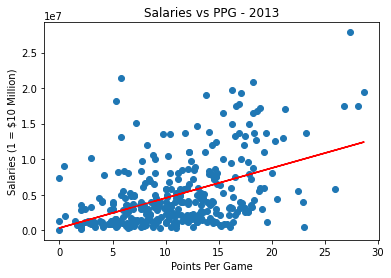

In [54]:
# Plot the linear regression model on top of the scatter plot
#Define X & Y values
x_values = ppg_2013['PPG']
y_values = ppg_2013['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs PPG - 2013')
plt.xlabel('Points Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(ppg_2013['PPG'], ppg_2013['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [55]:
#Points to Salary Analysis
namegroup_2014 = salarystats_2014.groupby(["Name","Salaries"])
#Create PPG DF
ppg_2014 = namegroup_2014["PTS"].mean().reset_index(name='PPG')
# Pull Top 5 Salaries & Top 5 PPG for 2014
top5_ppg2014 = ppg_2014.nlargest(5,['PPG'])
top5_ppg2014.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
183,Kevin Durant,"$18,773,176.00",32.01
45,Carmelo Anthony,"$21,490,000.00",27.43
204,LeBron James,"$19,067,500.00",27.13
185,Kevin Love,"$14,693,906.00",26.10
136,James Harden,"$13,668,750.00",25.36


In [56]:
#Top 5 player Salaries for that year
top5_salary2014 = ppg_2014.nlargest(5,['Salaries'])
top5_salary2014.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
191,Kobe Bryant,"$30,453,000.00",13.83
84,Dirk Nowitzki,"$22,721,381.00",21.69
45,Carmelo Anthony,"$21,490,000.00",27.43
160,Joe Johnson,"$21,466,718.00",15.76
89,Dwight Howard,"$20,513,178.00",18.27


Correlation Coefficient: 0.5


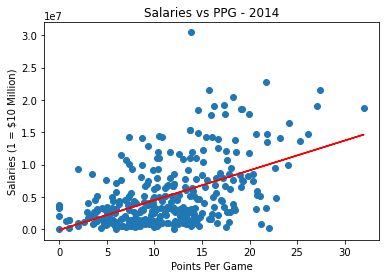

In [57]:
# Plot the linear regression model on top of the scatter plot
#Define X & Y values
x_values = ppg_2014['PPG']
y_values = ppg_2014['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs PPG - 2014')
plt.xlabel('Points Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(ppg_2014['PPG'], ppg_2014['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [58]:
#Points to Salary Analysis
namegroup_2015 = salarystats_2015.groupby(["Name","Salaries"])
#Create PPG DF
ppg_2015 = namegroup_2015["PTS"].mean().reset_index(name='PPG')
# Pull Top 5 Salaries & Top 5 PPG for 2015
top5_ppg2015 = ppg_2015.nlargest(5,['PPG'])
top5_ppg2015.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
246,Michael Beasley,"$330,225.00",34.00
299,Russell Westbrook,"$15,719,062.00",28.15
150,James Harden,"$14,693,906.00",27.37
139,Isaiah Thomas,"$7,238,606.00",26.00
201,Kevin Durant,"$19,997,513.00",25.41


In [59]:
#Top 5 player Salaries for that year
top5_salary2015 = ppg_2015.nlargest(5,['Salaries'])
top5_salary2015.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
208,Kobe Bryant,"$23,500,000.00",22.34
172,Joe Johnson,"$23,180,790.00",14.43
52,Carmelo Anthony,"$22,458,401.00",24.15
100,Dwight Howard,"$21,436,271.00",15.76
59,Chris Bosh,"$20,644,400.00",21.09


Correlation Coefficient: 0.47


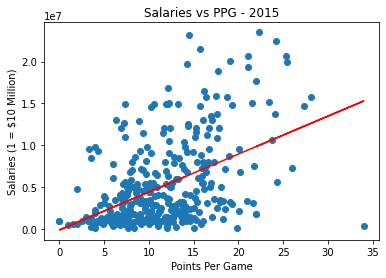

In [60]:
# Plot the linear regression model on top of the scatter plot
#Define X & Y values
x_values = ppg_2015['PPG']
y_values = ppg_2015['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs PPG - 2015')
plt.xlabel('Points Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(ppg_2015['PPG'], ppg_2015['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [61]:
#Points to Salary Analysis
namegroup_2016 = salarystats_2016.groupby(["Name","Salaries"])
#Create PPG DF
ppg_2016 = namegroup_2016["PTS"].mean().reset_index(name='PPG')
# Pull Top 5 Salaries & Top 5 PPG for 2016
top5_ppg2016 = ppg_2016.nlargest(5,['PPG'])
top5_ppg2016.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
175,Jordan McRae,"$172,971.00",36.00
102,Enes Kanter,"$16,407,500.00",33.00
310,Stephen Curry,"$11,370,786.00",30.06
139,Jamal Crawford,"$5,675,000.00",29.20
142,James Harden,"$15,719,062.00",28.98


In [62]:
#Top 5 player Salaries for that year
top5_salary2016 = ppg_2016.nlargest(5,['Salaries'])
top5_salary2016.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
203,Kobe Bryant,"$25,000,000.00",17.59
219,LeBron James,"$22,970,500.00",25.26
48,Carmelo Anthony,"$22,875,000.00",21.85
95,Dwight Howard,"$22,359,364.00",13.75
163,Joe Johnson,"$22,309,344.00",12.25


Correlation Coefficient: 0.5


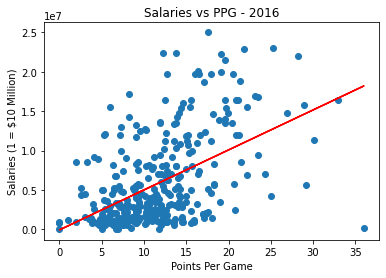

In [63]:
# Plot the linear regression model on top of the scatter plot
#Define X & Y values
x_values = ppg_2016['PPG']
y_values = ppg_2016['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs PPG - 2016')
plt.xlabel('Points Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(ppg_2016['PPG'], ppg_2016['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [64]:
#Points to Salary Analysis
namegroup_2017 = salarystats_2017.groupby(["Name","Salaries"])
#Create PPG DF
ppg_2017 = namegroup_2017["PTS"].mean().reset_index(name='PPG')
# Pull Top 5 Salaries & Top 5 PPG for 2017
top5_ppg2017 = ppg_2017.nlargest(5,['PPG'])
top5_ppg2017.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
279,Russell Westbrook,"$26,540,100.00",31.58
125,James Harden,"$26,540,100.00",29.09
110,Isaiah Thomas,"$6,587,131.00",28.93
290,Shabazz Napier,"$1,350,120.00",28.50
17,Anthony Davis,"$22,116,750.00",27.99


In [65]:
#Top 5 player Salaries for that year
top5_salary2017 = ppg_2017.nlargest(5,['Salaries'])
top5_salary2017.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
196,LeBron James,"$30,963,450.00",26.41
1,Al Horford,"$26,540,100.00",14.00
67,DeMar DeRozan,"$26,540,100.00",27.30
125,James Harden,"$26,540,100.00",29.09
176,Kevin Durant,"$26,540,100.00",25.08


Correlation Coefficient: 0.48


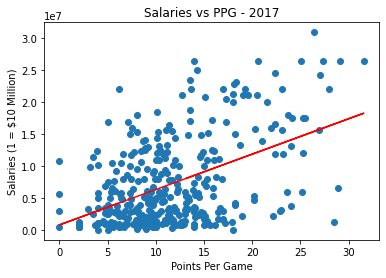

In [66]:
# Plot the linear regression model on top of the scatter plot
#Define X & Y values
x_values = ppg_2017['PPG']
y_values = ppg_2017['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs PPG - 2017')
plt.xlabel('Points Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(ppg_2017['PPG'], ppg_2017['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [67]:
#Points to Salary Analysis
namegroup_2018 = salarystats_2018.groupby(["Name","Salaries"])
#Create PPG DF
ppg_2018 = namegroup_2018["PTS"].mean().reset_index(name='PPG')
# Pull Top 5 Salaries & Top 5 PPG for 2018
top5_ppg2018 = ppg_2018.nlargest(5,['PPG'])
top5_ppg2018.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
147,James Harden,"$28,299,399.00",30.43
20,Anthony Davis,"$23,775,506.00",28.13
222,LeBron James,"$33,285,709.00",27.45
59,Damian Lillard,"$26,153,057.00",26.88
122,Giannis Antetokounmpo,"$22,471,911.00",26.85


In [68]:
#Top 5 player Salaries for that year
top5_salary2018 = ppg_2018.nlargest(5,['Salaries'])
top5_salary2018.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
319,Stephen Curry,"$34,682,550.00",26.39
222,LeBron James,"$33,285,709.00",27.45
279,Paul Millsap,"$30,769,231.00",14.76
125,Gordon Hayward,"$29,727,900.00",2.00
30,Blake Griffin,"$29,512,900.00",21.41


Correlation Coefficient: 0.46


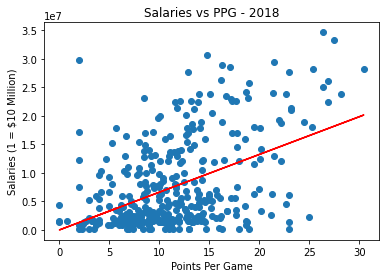

In [69]:
# Plot the linear regression model on top of the scatter plot
#Define X & Y values
x_values = ppg_2018['PPG']
y_values = ppg_2018['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs PPG - 2018')
plt.xlabel('Points Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(ppg_2018['PPG'], ppg_2018['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [70]:
#Points to Salary Analysis
namegroup_2019 = salarystats_2019.groupby(["Name","Salaries"])
#Create PPG DF
ppg_2019 = namegroup_2019["PTS"].mean().reset_index(name='PPG')
# Pull Top 5 Salaries & Top 5 PPG for 2019
top5_ppg2019 = ppg_2019.nlargest(5,['PPG'])
top5_ppg2019.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
16,Anfernee Simons,"$1,837,800.00",37.00
146,James Harden,"$30,570,000.00",36.13
296,Skal Labissiere,"$1,544,951.00",29.00
264,Paul George,"$30,560,700.00",28.04
303,TJ Leaf,"$2,407,560.00",28.00


In [71]:
#Top 5 player Salaries for that year
top5_salary2019 = ppg_2019.nlargest(5,['Salaries'])
top5_salary2019.style.format({"Salaries":"${:,.2f}" , "PPG":"{:,.2f}"})

,Name,Salaries,PPG
300,Stephen Curry,"$37,457,154.00",27.26
283,Russell Westbrook,"$35,665,000.00",22.95
48,Chris Paul,"$35,654,150.00",15.62
216,LeBron James,"$35,654,150.00",27.36
26,Blake Griffin,"$31,873,932.00",24.55


Correlation Coefficient: 0.43


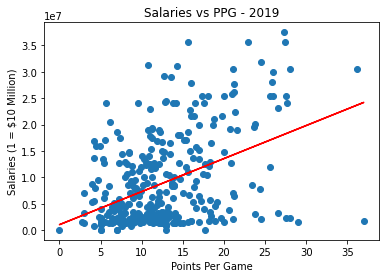

In [72]:
# Plot the linear regression model on top of the scatter plot
#Define X & Y values
x_values = ppg_2019['PPG']
y_values = ppg_2019['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs PPG - 2019')
plt.xlabel('Points Per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between Assists and Salary
correlation = st.pearsonr(ppg_2019['PPG'], ppg_2019['Salaries'])
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

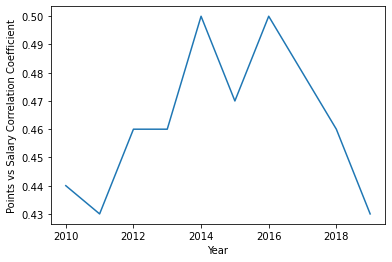

In [73]:
x_axis =[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y_axis = [.44, .43, .46, .46, .50, .47, .50, .48, .46, .43]
plt.plot(x_axis,y_axis)
plt.xlabel("Year")
plt.ylabel("Points vs Salary Correlation Coefficient")
plt.show()

In [74]:
#####3PM#####
#####3PM#####
#####3PM#####
#####3PM#####
#####3PM#####

In [75]:
#3PM to Salary Analysis
namegroup_2010 = salarystats_2010.groupby(["Name","Salaries"])
#Create 3PM DF
threepm_2010 = namegroup_2010["FG3M"].sum().reset_index(name='FG3M')
# Pull Top 5 Salaries & Top 5 3PM for 2010
top5_3pm2010 = threepm_2010.nlargest(5,['FG3M'])
top5_3pm2010.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
1,Aaron Brooks,"$1,118,520.00",209.00
146,Jason Kidd,"$8,000,000.00",176.00
254,Rashard Lewis,"$18,876,000.00",168.00
291,Stephen Curry,"$2,710,560.00",164.00
76,Danilo Gallinari,"$3,089,040.00",162.00


In [76]:
#Top 5 player Salaries for that year
top5_salary2010 = threepm_2010.nlargest(5,['Salaries'])
top5_salary2010.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
307,Tracy McGrady,"$23,239,562.00",15.00
192,Kobe Bryant,"$23,034,375.00",99.00
158,Jermaine O'Neal,"$23,016,000.00",0.00
302,Tim Duncan,"$22,183,220.00",2.00
285,Shaquille O'Neal,"$20,000,000.00",0.00


Correlation Coefficient: 0.28


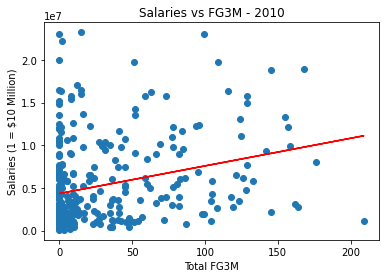

In [77]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = threepm_2010['FG3M']
y_values = threepm_2010['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs FG3M - 2010')
plt.xlabel('Total FG3M')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between FG3M and Salary
correlation = st.pearsonr(threepm_2010['FG3M'], threepm_2010['Salaries'])
threepm2010_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [78]:
#3PM to Salary Analysis
namegroup_2011 = salarystats_2011.groupby(["Name","Salaries"])
#Create 3PM DF
threepm_2011 = namegroup_2011["FG3M"].sum().reset_index(name='FG3M')
# Pull Top 5 Salaries & Top 5 3PM for 2011
top5_3pm2011 = threepm_2011.nlargest(5,['FG3M'])
top5_3pm2011.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
96,Dorell Wright,"$3,500,000.00",194.00
146,Jason Richardson,"$14,444,444.00",189.00
188,Kevin Martin,"$11,100,005.00",176.00
257,Ray Allen,"$10,000,000.00",168.00
73,Danny Granger,"$10,973,202.00",157.00


In [79]:
#Top 5 player Salaries for that year
top5_salary2011 = threepm_2011.nlargest(5,['Salaries'])
top5_salary2011.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
192,Kobe Bryant,"$24,806,250.00",115.00
255,Rashard Lewis,"$19,573,711.00",86.00
186,Kevin Garnett,"$18,800,000.00",1.00
299,Tim Duncan,"$18,700,000.00",0.00
15,Andrei Kirilenko,"$17,823,000.00",35.00


Correlation Coefficient: 0.31


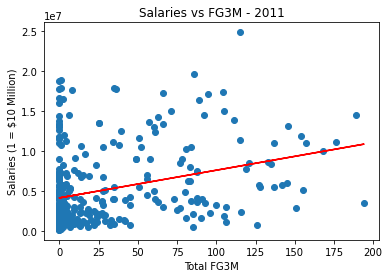

In [80]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = threepm_2011['FG3M']
y_values = threepm_2011['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs FG3M - 2011')
plt.xlabel('Total FG3M')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between FG3M and Salary
correlation = st.pearsonr(threepm_2011['FG3M'], threepm_2011['Salaries'])
threepm2011_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [81]:
#3PM to Salary Analysis
namegroup_2012 = salarystats_2012.groupby(["Name","Salaries"])
#Create 3PM DF
threepm_2012 = namegroup_2012["FG3M"].sum().reset_index(name='FG3M')
# Pull Top 5 Salaries & Top 5 3PM for 2012
top5_3pm2012 = threepm_2012.nlargest(5,['FG3M'])
top5_3pm2012.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
291,Ryan Anderson,"$2,244,601.00",166.00
195,Kevin Durant,"$15,506,632.00",133.00
33,Brandon Jennings,"$2,493,720.00",129.00
169,Joe Johnson,"$18,038,573.00",125.00
72,Danny Granger,"$12,015,904.00",123.00


In [82]:
#Top 5 player Salaries for that year
top5_salary2012 = threepm_2012.nlargest(5,['Salaries'])
top5_salary2012.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
203,Kobe Bryant,"$25,244,493.00",87.00
333,Vince Carter,"$21,300,000.00",50.00
196,Kevin Garnett,"$21,247,044.00",3.00
317,Tim Duncan,"$21,164,619.00",0.00
274,Rashard Lewis,"$21,136,631.00",10.00


Correlation Coefficient: 0.27


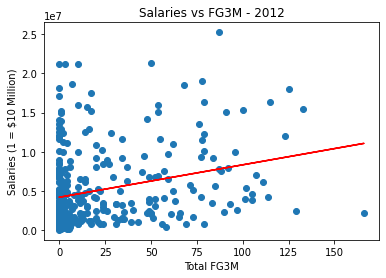

In [83]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = threepm_2012['FG3M']
y_values = threepm_2012['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs FG3M - 2012')
plt.xlabel('Total FG3M')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between FG3M and Salary
correlation = st.pearsonr(threepm_2012['FG3M'], threepm_2012['Salaries'])
threepm2012_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [84]:
#3PM to Salary Analysis
namegroup_2013 = salarystats_2013.groupby(["Name","Salaries"])
#Create 3PM DF
threepm_2013 = namegroup_2013["FG3M"].sum().reset_index(name='FG3M')
# Pull Top 5 Salaries & Top 5 3PM for 2013
top5_3pm2013 = threepm_2013.nlargest(5,['FG3M'])
top5_3pm2013.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
299,Stephen Curry,"$3,958,742.00",272.00
199,Klay Thompson,"$2,222,160.00",211.00
64,Damian Lillard,"$3,065,040.00",185.00
143,James Harden,"$5,820,416.00",179.00
68,Danny Green,"$3,500,000.00",177.00


In [85]:
#Top 5 player Salaries for that year
top5_salary2013 = threepm_2013.nlargest(5,['Salaries'])
top5_salary2013.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
200,Kobe Bryant,"$27,849,000.00",132.00
36,Brandon Roy,"$21,459,805.00",0.00
92,Dirk Nowitzki,"$20,907,128.00",59.00
167,Joe Johnson,"$19,752,645.00",148.00
44,Carmelo Anthony,"$19,450,000.00",157.00


Correlation Coefficient: 0.24


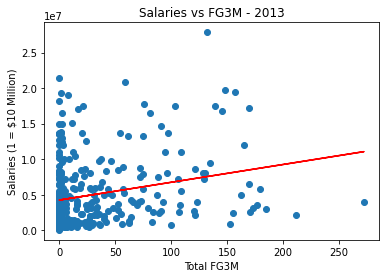

In [86]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = threepm_2013['FG3M']
y_values = threepm_2013['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs FG3M - 2013')
plt.xlabel('Total FG3M')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between FG3M and Salary
correlation = st.pearsonr(threepm_2013['FG3M'], threepm_2013['Salaries'])
threepm2013_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [87]:
#3PM to Salary Analysis
namegroup_2014 = salarystats_2014.groupby(["Name","Salaries"])
#Create 3PM DF
threepm_2014 = namegroup_2014["FG3M"].sum().reset_index(name='FG3M')
# Pull Top 5 Salaries & Top 5 3PM for 2014
top5_3pm2014 = threepm_2014.nlargest(5,['FG3M'])
top5_3pm2014.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
293,Stephen Curry,"$9,887,642.00",261.00
190,Klay Thompson,"$3,245,151.00",223.00
62,Damian Lillard,"$3,202,920.00",218.00
328,Wesley Matthews,"$6,875,480.00",201.00
183,Kevin Durant,"$18,773,176.00",192.00


In [88]:
#Top 5 player Salaries for that year
top5_salary2014 = threepm_2014.nlargest(5,['Salaries'])
top5_salary2014.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
191,Kobe Bryant,"$30,453,000.00",3.00
84,Dirk Nowitzki,"$22,721,381.00",131.00
45,Carmelo Anthony,"$21,490,000.00",167.00
160,Joe Johnson,"$21,466,718.00",162.00
89,Dwight Howard,"$20,513,178.00",2.00


Correlation Coefficient: 0.24


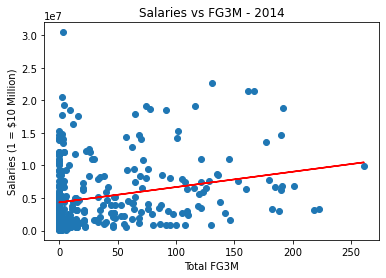

In [89]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = threepm_2014['FG3M']
y_values = threepm_2014['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs FG3M - 2014')
plt.xlabel('Total FG3M')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between FG3M and Salary
correlation = st.pearsonr(threepm_2014['FG3M'], threepm_2014['Salaries'])
threepm2014_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [90]:
#3PM to Salary Analysis
namegroup_2015 = salarystats_2015.groupby(["Name","Salaries"])
#Create 3PM DF
threepm_2015 = namegroup_2015["FG3M"].sum().reset_index(name='FG3M')
# Pull Top 5 Salaries & Top 5 3PM for 2015
top5_3pm2015 = threepm_2015.nlargest(5,['FG3M'])
top5_3pm2015.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
317,Stephen Curry,"$10,629,213.00",286.00
207,Klay Thompson,"$3,075,880.00",239.00
213,Kyle Korver,"$6,253,521.00",221.00
150,James Harden,"$14,693,906.00",208.00
141,JJ Redick,"$6,792,500.00",200.00


In [91]:
#Top 5 player Salaries for that year
top5_salary2015 = threepm_2015.nlargest(5,['Salaries'])
top5_salary2015.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
208,Kobe Bryant,"$23,500,000.00",54.00
172,Joe Johnson,"$23,180,790.00",121.00
52,Carmelo Anthony,"$22,458,401.00",61.00
100,Dwight Howard,"$21,436,271.00",1.00
59,Chris Bosh,"$20,644,400.00",63.00


Correlation Coefficient: 0.29


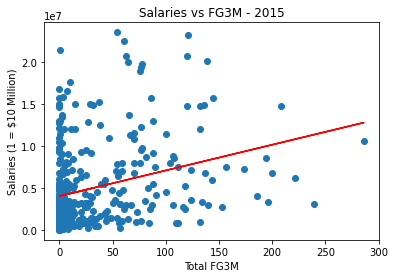

In [92]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = threepm_2015['FG3M']
y_values = threepm_2015['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs FG3M - 2015')
plt.xlabel('Total FG3M')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between FG3M and Salary
correlation = st.pearsonr(threepm_2015['FG3M'], threepm_2015['Salaries'])
threepm2015_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [93]:
#3PM to Salary Analysis
namegroup_2016 = salarystats_2016.groupby(["Name","Salaries"])
#Create 3PM DF
threepm_2016 = namegroup_2016["FG3M"].sum().reset_index(name='FG3M')
# Pull Top 5 Salaries & Top 5 3PM for 2016
top5_3pm2016 = threepm_2016.nlargest(5,['FG3M'])
top5_3pm2016.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
310,Stephen Curry,"$11,370,786.00",402.00
202,Klay Thompson,"$15,501,000.00",276.00
142,James Harden,"$15,719,062.00",236.00
69,Damian Lillard,"$4,236,286.00",229.00
210,Kyle Lowry,"$12,000,000.00",212.00


In [94]:
#Top 5 player Salaries for that year
top5_salary2016 = threepm_2016.nlargest(5,['Salaries'])
top5_salary2016.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
203,Kobe Bryant,"$25,000,000.00",133.00
219,LeBron James,"$22,970,500.00",87.00
48,Carmelo Anthony,"$22,875,000.00",105.00
95,Dwight Howard,"$22,359,364.00",0.00
163,Joe Johnson,"$22,309,344.00",120.00


Correlation Coefficient: 0.39


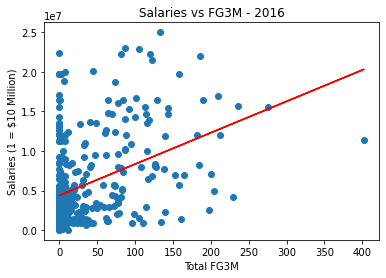

In [95]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = threepm_2016['FG3M']
y_values = threepm_2016['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs FG3M - 2016')
plt.xlabel('Total FG3M')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between FG3M and Salary
correlation = st.pearsonr(threepm_2016['FG3M'], threepm_2016['Salaries'])
threepm2016_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [96]:
#3PM to Salary Analysis
namegroup_2017 = salarystats_2017.groupby(["Name","Salaries"])
#Create 3PM DF
threepm_2017 = namegroup_2017["FG3M"].sum().reset_index(name='FG3M')
# Pull Top 5 Salaries & Top 5 3PM for 2017
top5_3pm2017 = threepm_2017.nlargest(5,['FG3M'])
top5_3pm2017.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
299,Stephen Curry,"$12,112,359.00",324.00
181,Klay Thompson,"$16,663,575.00",268.00
125,James Harden,"$26,540,100.00",262.00
110,Isaiah Thomas,"$6,587,131.00",245.00
172,Kemba Walker,"$12,000,000.00",240.00


In [97]:
#Top 5 player Salaries for that year
top5_salary2017 = threepm_2017.nlargest(5,['Salaries'])
top5_salary2017.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
196,LeBron James,"$30,963,450.00",124.00
1,Al Horford,"$26,540,100.00",86.00
67,DeMar DeRozan,"$26,540,100.00",33.00
125,James Harden,"$26,540,100.00",262.00
176,Kevin Durant,"$26,540,100.00",117.00


Correlation Coefficient: 0.44


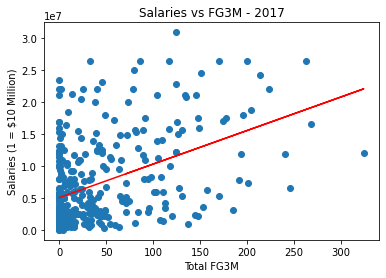

In [98]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = threepm_2017['FG3M']
y_values = threepm_2017['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs FG3M - 2017')
plt.xlabel('Total FG3M')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between FG3M and Salary
correlation = st.pearsonr(threepm_2017['FG3M'], threepm_2017['Salaries'])
threepm2017_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [99]:
#3PM to Salary Analysis
namegroup_2018 = salarystats_2018.groupby(["Name","Salaries"])
#Create 3PM DF
threepm_2018 = namegroup_2018["FG3M"].sum().reset_index(name='FG3M')
# Pull Top 5 Salaries & Top 5 3PM for 2018
top5_3pm2018 = threepm_2018.nlargest(5,['FG3M'])
top5_3pm2018.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
147,James Harden,"$28,299,399.00",265.00
278,Paul George,"$19,300,000.00",244.00
214,Kyle Lowry,"$28,903,704.00",238.00
197,Kemba Walker,"$12,000,000.00",231.00
205,Klay Thompson,"$17,826,150.00",229.00


In [100]:
#Top 5 player Salaries for that year
top5_salary2018 = threepm_2018.nlargest(5,['Salaries'])
top5_salary2018.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
319,Stephen Curry,"$34,682,550.00",212.00
222,LeBron James,"$33,285,709.00",149.00
279,Paul Millsap,"$30,769,231.00",38.00
125,Gordon Hayward,"$29,727,900.00",0.00
30,Blake Griffin,"$29,512,900.00",111.00


Correlation Coefficient: 0.5


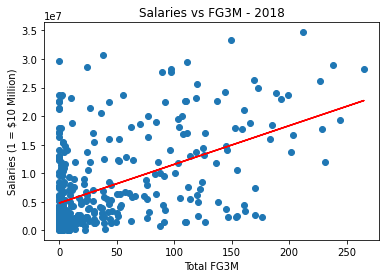

In [101]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = threepm_2018['FG3M']
y_values = threepm_2018['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs FG3M - 2018')
plt.xlabel('Total FG3M')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between FG3M and Salary
correlation = st.pearsonr(threepm_2018['FG3M'], threepm_2018['Salaries'])
threepm2018_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [102]:
#3PM to Salary Analysis
namegroup_2019 = salarystats_2019.groupby(["Name","Salaries"])
#Create 3PM DF
threepm_2019 = namegroup_2019["FG3M"].sum().reset_index(name='FG3M')
# Pull Top 5 Salaries & Top 5 3PM for 2019
top5_3pm2019 = threepm_2019.nlargest(5,['FG3M'])
top5_3pm2019.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
146,James Harden,"$30,570,000.00",378.00
300,Stephen Curry,"$37,457,154.00",354.00
264,Paul George,"$30,560,700.00",292.00
37,Buddy Hield,"$3,833,760.00",278.00
191,Kemba Walker,"$12,000,000.00",260.00


In [103]:
#Top 5 player Salaries for that year
top5_salary2019 = threepm_2019.nlargest(5,['Salaries'])
top5_salary2019.style.format({"Salaries":"${:,.2f}" , "FG3M":"{:,.2f}"})

,Name,Salaries,FG3M
300,Stephen Curry,"$37,457,154.00",354.00
283,Russell Westbrook,"$35,665,000.00",119.00
48,Chris Paul,"$35,654,150.00",127.00
216,LeBron James,"$35,654,150.00",111.00
26,Blake Griffin,"$31,873,932.00",189.00


Correlation Coefficient: 0.4


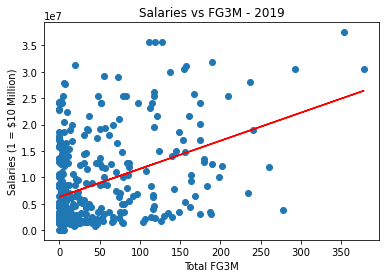

In [104]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = threepm_2019['FG3M']
y_values = threepm_2019['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs FG3M - 2019')
plt.xlabel('Total FG3M')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between FG3M and Salary
correlation = st.pearsonr(threepm_2019['FG3M'], threepm_2019['Salaries'])
threepm2019_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

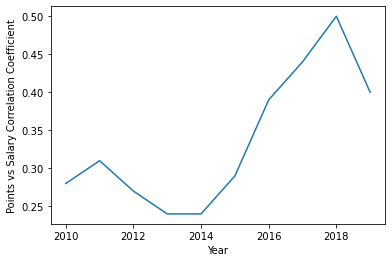

In [105]:
x_axis =[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y_axis = [.28,.31,.27,.24,.24,.29,.39,.44,.5,.4]
plt.plot(x_axis,y_axis)
plt.xlabel("Year")
plt.ylabel("3 Pointers vs Salary Correlation Coefficient")
plt.show()

In [106]:
#####RRRRR#####
#####EEEEE#####
#####BBBBB#####
#####OOOOO#####
#####UUUUU#####
#####NNNNN#####
#####DDDDD#####
#####SSSSS#####

In [107]:
#REB to Salary Analysis
namegroup_2010 = salarystats_2010.groupby(["Name","Salaries"])
#Create REB DF
reb_2010 = namegroup_2010["REB"].mean().reset_index(name='REB')
# Pull Top 5 Salaries & Top 5 REB for 2010
top5_reb2010 = reb_2010.nlargest(5,['REB'])
top5_reb2010.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
188,Kevin Love,"$3,401,040.00",13.27
103,Dwight Howard,"$15,202,590.00",13.20
161,Joakim Noah,"$2,455,680.00",12.19
210,Marcus Camby,"$7,650,000.00",11.77
326,Zach Randolph,"$16,000,000.00",11.73


In [108]:
#Top 5 player Salaries for that year
top5_salary2010 = reb_2010.nlargest(5,['Salaries'])
top5_salary2010.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
307,Tracy McGrady,"$23,239,562.00",3.71
192,Kobe Bryant,"$23,034,375.00",5.36
158,Jermaine O'Neal,"$23,016,000.00",6.94
302,Tim Duncan,"$22,183,220.00",10.08
285,Shaquille O'Neal,"$20,000,000.00",6.70


Correlation Coefficient: 0.29


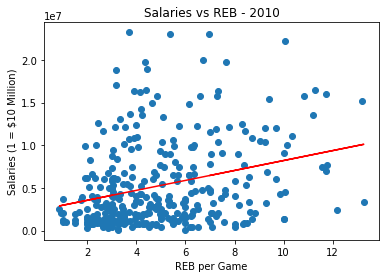

In [109]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = reb_2010['REB']
y_values = reb_2010['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs REB - 2010')
plt.xlabel('REB per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between REB per Game and Salary
correlation = st.pearsonr(reb_2010['REB'], reb_2010['Salaries'])
reb2010_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [110]:
#REB to Salary Analysis
namegroup_2011 = salarystats_2011.groupby(["Name","Salaries"])
#Create REB DF
reb_2011 = namegroup_2011["REB"].mean().reset_index(name='REB')
# Pull Top 5 Salaries & Top 5 REB for 2011
top5_reb2011 = reb_2011.nlargest(5,['REB'])
top5_reb2011.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
187,Kevin Love,"$3,638,280.00",15.23
98,Dwight Howard,"$16,647,180.00",14.08
58,Chris Johnson,"$164,368.00",13.00
259,Reggie Evans,"$5,080,000.00",12.50
326,Zach Randolph,"$17,666,666.00",12.18


In [111]:
#Top 5 player Salaries for that year
top5_salary2011 = reb_2011.nlargest(5,['Salaries'])
top5_salary2011.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
192,Kobe Bryant,"$24,806,250.00",5.11
255,Rashard Lewis,"$19,573,711.00",5.37
186,Kevin Garnett,"$18,800,000.00",8.89
299,Tim Duncan,"$18,700,000.00",8.92
15,Andrei Kirilenko,"$17,823,000.00",5.11


Correlation Coefficient: 0.27


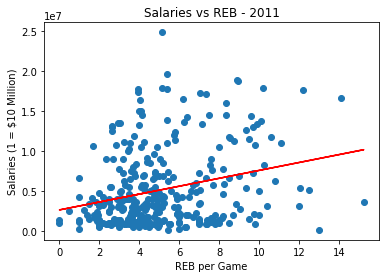

In [112]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = reb_2011['REB']
y_values = reb_2011['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs REB - 2011')
plt.xlabel('REB per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between REB per Game and Salary
correlation = st.pearsonr(reb_2011['REB'], reb_2011['Salaries'])
reb2011_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [113]:
#REB to Salary Analysis
namegroup_2012 = salarystats_2012.groupby(["Name","Salaries"])
#Create REB DF
reb_2012 = namegroup_2012["REB"].mean().reset_index(name='REB')
# Pull Top 5 Salaries & Top 5 REB for 2012
top5_reb2012 = reb_2012.nlargest(5,['REB'])
top5_reb2012.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
103,Dwight Howard,"$18,091,770.00",14.54
197,Kevin Love,"$4,609,701.00",13.35
15,Andrew Bynum,"$14,900,000.00",11.82
8,Anderson Varejao,"$7,700,000.00",11.48
82,DeMarcus Cousins,"$3,627,720.00",11.16


In [114]:
#Top 5 player Salaries for that year
top5_salary2012 = reb_2012.nlargest(5,['Salaries'])
top5_salary2012.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
203,Kobe Bryant,"$25,244,493.00",5.40
333,Vince Carter,"$21,300,000.00",3.10
196,Kevin Garnett,"$21,247,044.00",8.23
317,Tim Duncan,"$21,164,619.00",8.97
274,Rashard Lewis,"$21,136,631.00",4.33


Correlation Coefficient: 0.29


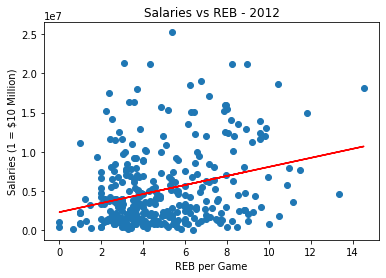

In [115]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = reb_2012['REB']
y_values = reb_2012['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs REB - 2012')
plt.xlabel('REB per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between REB per Game and Salary
correlation = st.pearsonr(reb_2012['REB'], reb_2012['Salaries'])
reb2012_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [116]:
#REB to Salary Analysis
namegroup_2013 = salarystats_2013.groupby(["Name","Salaries"])
#Create REB DF
reb_2013 = namegroup_2013["REB"].mean().reset_index(name='REB')
# Pull Top 5 Salaries & Top 5 REB for 2013
top5_reb2013 = reb_2013.nlargest(5,['REB'])
top5_reb2013.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
108,Enes Kanter,"$4,443,360.00",15.00
9,Anderson Varejao,"$8,400,000.00",14.44
196,Kevin Love,"$13,668,750.00",14.00
250,Mike Scott,"$473,604.00",14.00
311,Timofey Mozgov,"$2,794,621.00",13.00


In [117]:
#Top 5 player Salaries for that year
top5_salary2013 = reb_2013.nlargest(5,['Salaries'])
top5_salary2013.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
200,Kobe Bryant,"$27,849,000.00",5.55
36,Brandon Roy,"$21,459,805.00",2.80
92,Dirk Nowitzki,"$20,907,128.00",7.17
167,Joe Johnson,"$19,752,645.00",3.03
44,Carmelo Anthony,"$19,450,000.00",6.87


Correlation Coefficient: 0.28


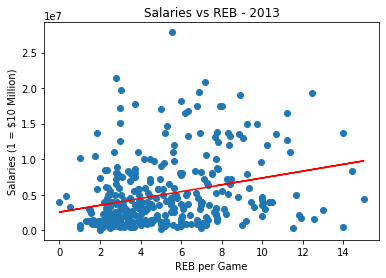

In [118]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = reb_2013['REB']
y_values = reb_2013['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs REB - 2013')
plt.xlabel('REB per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between REB per Game and Salary
correlation = st.pearsonr(reb_2013['REB'], reb_2013['Salaries'])
reb2013_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [119]:
#REB to Salary Analysis
namegroup_2014 = salarystats_2014.groupby(["Name","Salaries"])
#Create REB DF
reb_2014 = namegroup_2014["REB"].mean().reset_index(name='REB')
# Pull Top 5 Salaries & Top 5 REB for 2014
top5_reb2014 = reb_2014.nlargest(5,['REB'])
top5_reb2014.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
73,DeAndre Jordan,"$10,986,550.00",13.59
13,Andre Drummond,"$2,462,400.00",13.22
58,Cole Aldrich,"$884,293.00",13.00
185,Kevin Love,"$14,693,906.00",12.51
89,Dwight Howard,"$20,513,178.00",12.20


In [120]:
#Top 5 player Salaries for that year
top5_salary2014 = reb_2014.nlargest(5,['Salaries'])
top5_salary2014.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
191,Kobe Bryant,"$30,453,000.00",4.33
84,Dirk Nowitzki,"$22,721,381.00",6.22
45,Carmelo Anthony,"$21,490,000.00",8.08
160,Joe Johnson,"$21,466,718.00",3.42
89,Dwight Howard,"$20,513,178.00",12.20


Correlation Coefficient: 0.28


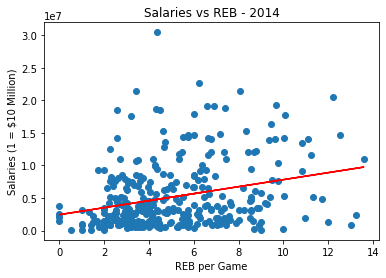

In [121]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = reb_2014['REB']
y_values = reb_2014['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs REB - 2014')
plt.xlabel('REB per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between REB per Game and Salary
correlation = st.pearsonr(reb_2014['REB'], reb_2014['Salaries'])
reb2014_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [122]:
#REB to Salary Analysis
namegroup_2015 = salarystats_2015.groupby(["Name","Salaries"])
#Create REB DF
reb_2015 = namegroup_2015["REB"].mean().reset_index(name='REB')
# Pull Top 5 Salaries & Top 5 REB for 2015
top5_reb2015 = reb_2015.nlargest(5,['REB'])
top5_reb2015.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
82,DeAndre Jordan,"$11,440,123.00",14.95
15,Andre Drummond,"$2,568,360.00",13.46
84,DeMarcus Cousins,"$13,701,250.00",12.66
298,Rudy Gobert,"$1,127,400.00",12.35
132,Hassan Whiteside,"$775,191.00",11.84


In [123]:
#Top 5 player Salaries for that year
top5_salary2015 = reb_2015.nlargest(5,['Salaries'])
top5_salary2015.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
208,Kobe Bryant,"$23,500,000.00",5.69
172,Joe Johnson,"$23,180,790.00",4.80
52,Carmelo Anthony,"$22,458,401.00",6.60
100,Dwight Howard,"$21,436,271.00",10.51
59,Chris Bosh,"$20,644,400.00",7.05


Correlation Coefficient: 0.27


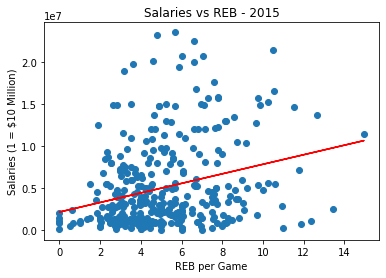

In [124]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = reb_2015['REB']
y_values = reb_2015['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs REB - 2015')
plt.xlabel('REB per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between REB per Game and Salary
correlation = st.pearsonr(reb_2015['REB'], reb_2015['Salaries'])
reb2015_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [125]:
#REB to Salary Analysis
namegroup_2016 = salarystats_2016.groupby(["Name","Salaries"])
#Create REB DF
reb_2016 = namegroup_2016["REB"].mean().reset_index(name='REB')
# Pull Top 5 Salaries & Top 5 REB for 2016
top5_reb2016 = reb_2016.nlargest(5,['REB'])
top5_reb2016.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
102,Enes Kanter,"$16,407,500.00",20.00
11,Andre Drummond,"$3,272,090.00",14.79
79,DeAndre Jordan,"$19,689,000.00",13.75
161,Joakim Noah,"$13,400,000.00",13.00
319,Thomas Robinson,"$981,348.00",12.29


In [126]:
#Top 5 player Salaries for that year
top5_salary2016 = reb_2016.nlargest(5,['Salaries'])
top5_salary2016.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
203,Kobe Bryant,"$25,000,000.00",3.74
219,LeBron James,"$22,970,500.00",7.43
48,Carmelo Anthony,"$22,875,000.00",7.72
95,Dwight Howard,"$22,359,364.00",11.76
163,Joe Johnson,"$22,309,344.00",3.60


Correlation Coefficient: 0.3


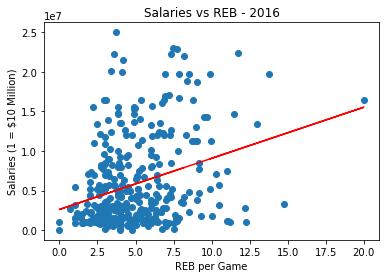

In [127]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = reb_2016['REB']
y_values = reb_2016['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs REB - 2016')
plt.xlabel('REB per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between REB per Game and Salary
correlation = st.pearsonr(reb_2016['REB'], reb_2016['Salaries'])
reb2016_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [128]:
#REB to Salary Analysis
namegroup_2017 = salarystats_2017.groupby(["Name","Salaries"])
#Create REB DF
reb_2017 = namegroup_2017["REB"].mean().reset_index(name='REB')
# Pull Top 5 Salaries & Top 5 REB for 2017
top5_reb2017 = reb_2017.nlargest(5,['REB'])
top5_reb2017.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
106,Hassan Whiteside,"$22,116,750.00",14.13
16,Anthony Bennett,"$1,015,696.00",14.00
11,Andre Drummond,"$22,116,750.00",13.77
65,DeAndre Jordan,"$21,165,675.00",13.75
278,Rudy Gobert,"$2,121,287.00",12.78


In [129]:
#Top 5 player Salaries for that year
top5_salary2017 = reb_2017.nlargest(5,['Salaries'])
top5_salary2017.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
196,LeBron James,"$30,963,450.00",8.64
1,Al Horford,"$26,540,100.00",6.84
67,DeMar DeRozan,"$26,540,100.00",5.22
125,James Harden,"$26,540,100.00",8.14
176,Kevin Durant,"$26,540,100.00",8.27


Correlation Coefficient: 0.31


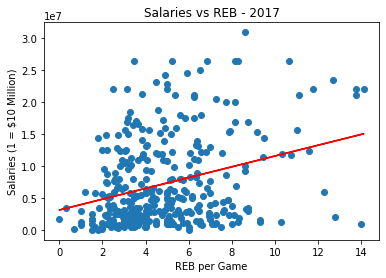

In [130]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = reb_2017['REB']
y_values = reb_2017['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs REB - 2017')
plt.xlabel('REB per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between REB per Game and Salary
correlation = st.pearsonr(reb_2017['REB'], reb_2017['Salaries'])
reb2017_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [131]:
#REB to Salary Analysis
namegroup_2018 = salarystats_2018.groupby(["Name","Salaries"])
#Create REB DF
reb_2018 = namegroup_2018["REB"].mean().reset_index(name='REB')
# Pull Top 5 Salaries & Top 5 REB for 2018
top5_reb2018 = reb_2018.nlargest(5,['REB'])
top5_reb2018.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
13,Andre Drummond,"$23,775,506.00",15.99
75,DeAndre Jordan,"$22,642,350.00",15.21
78,DeMarcus Cousins,"$18,063,850.00",12.85
99,Dwight Howard,"$23,500,000.00",12.49
194,Karl-Anthony Towns,"$6,216,840.00",12.34


In [132]:
#Top 5 player Salaries for that year
top5_salary2018 = reb_2018.nlargest(5,['Salaries'])
top5_salary2018.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
319,Stephen Curry,"$34,682,550.00",5.12
222,LeBron James,"$33,285,709.00",8.65
279,Paul Millsap,"$30,769,231.00",6.43
125,Gordon Hayward,"$29,727,900.00",1.00
30,Blake Griffin,"$29,512,900.00",7.38


Correlation Coefficient: 0.24


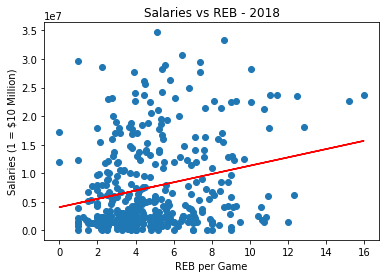

In [133]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = reb_2018['REB']
y_values = reb_2018['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs REB - 2018')
plt.xlabel('REB per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between REB per Game and Salary
correlation = st.pearsonr(reb_2018['REB'], reb_2018['Salaries'])
reb2018_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [134]:
#REB to Salary Analysis
namegroup_2019 = salarystats_2019.groupby(["Name","Salaries"])
#Create REB DF
reb_2019 = namegroup_2019["REB"].mean().reset_index(name='REB')
# Pull Top 5 Salaries & Top 5 REB for 2019
top5_reb2019 = reb_2019.nlargest(5,['REB'])
top5_reb2019.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
13,Andre Drummond,"$25,434,262.00",15.59
296,Skal Labissiere,"$1,544,951.00",15.00
166,Joel Embiid,"$25,467,250.00",13.61
72,DeAndre Jordan,"$22,897,200.00",13.07
99,Ekpe Udoh,"$3,360,000.00",13.00


In [135]:
#Top 5 player Salaries for that year
top5_salary2019 = reb_2019.nlargest(5,['Salaries'])
top5_salary2019.style.format({"Salaries":"${:,.2f}" , "REB":"{:,.2f}"})

,Name,Salaries,REB
300,Stephen Curry,"$37,457,154.00",5.35
283,Russell Westbrook,"$35,665,000.00",11.05
48,Chris Paul,"$35,654,150.00",4.57
216,LeBron James,"$35,654,150.00",8.45
26,Blake Griffin,"$31,873,932.00",7.53


Correlation Coefficient: 0.26


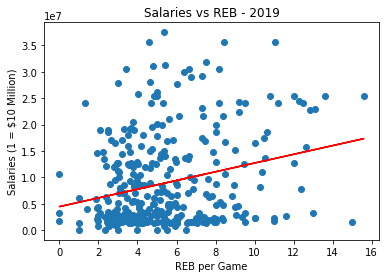

In [136]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = reb_2019['REB']
y_values = reb_2019['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs REB - 2019')
plt.xlabel('REB per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between REB per Game and Salary
correlation = st.pearsonr(reb_2019['REB'], reb_2019['Salaries'])
reb2019_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

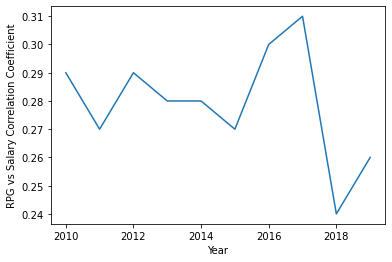

In [137]:
x_axis =[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y_axis = [.29,.27,.29,.28,.28,.27,.30,.31,.24,.26]
plt.plot(x_axis,y_axis)
plt.xlabel("Year")
plt.ylabel("RPG vs Salary Correlation Coefficient")
plt.show()

In [138]:
#####BBBBB#####
#####LLLLL#####
#####OOOOO#####
#####CCCCC#####
#####KKKKK#####
#####SSSSS#####

In [139]:
#BLK to Salary Analysis
namegroup_2010 = salarystats_2010.groupby(["Name","Salaries"])
#Create BLK DF
blk_2010 = namegroup_2010["BLK"].mean().reset_index(name='BLK')
# Pull Top 5 Salaries & Top 5 BLK for 2019
top5_blk2010 = blk_2010.nlargest(5,['BLK'])
top5_blk2010.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
103,Dwight Howard,"$15,202,590.00",2.78
16,Andrew Bogut,"$10,000,000.00",2.54
23,Anthony Randolph,"$1,837,560.00",2.38
124,Greg Oden,"$5,361,240.00",2.29
177,Josh Smith,"$10,800,000.00",2.12


In [140]:
#Top 5 player Salaries for that year
top5_salary2010 = blk_2010.nlargest(5,['Salaries'])
top5_salary2010.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
307,Tracy McGrady,"$23,239,562.00",0.50
192,Kobe Bryant,"$23,034,375.00",0.27
158,Jermaine O'Neal,"$23,016,000.00",1.36
302,Tim Duncan,"$22,183,220.00",1.52
285,Shaquille O'Neal,"$20,000,000.00",1.17


Correlation Coefficient: 0.21


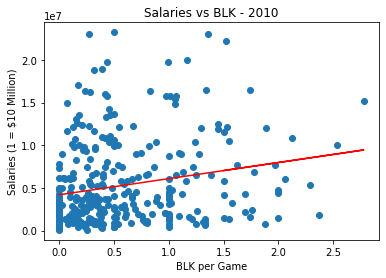

In [141]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = blk_2010['BLK']
y_values = blk_2010['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs BLK - 2010')
plt.xlabel('BLK per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between BLK per Game and Salary
correlation = st.pearsonr(blk_2010['BLK'], blk_2010['Salaries'])
blk2010_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [142]:
#BLK to Salary Analysis
namegroup_2011 = salarystats_2011.groupby(["Name","Salaries"])
#Create BLK DF
blk_2011 = namegroup_2011["BLK"].mean().reset_index(name='BLK')
# Pull Top 5 Salaries & Top 5 BLK for 2011
top5_blk2011 = blk_2011.nlargest(5,['BLK'])
top5_blk2011.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
282,Serge Ibaka,"$1,204,200.00",2.77
17,Andrew Bogut,"$11,000,000.00",2.58
312,Tyrus Thomas,"$6,611,570.00",2.50
132,JaVale McGee,"$1,601,040.00",2.49
98,Dwight Howard,"$16,647,180.00",2.38


In [143]:
#Top 5 player Salaries for that year
top5_salary2011 = blk_2011.nlargest(5,['Salaries'])
top5_salary2011.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
192,Kobe Bryant,"$24,806,250.00",0.15
255,Rashard Lewis,"$19,573,711.00",0.54
186,Kevin Garnett,"$18,800,000.00",0.80
299,Tim Duncan,"$18,700,000.00",1.92
15,Andrei Kirilenko,"$17,823,000.00",1.18


Correlation Coefficient: 0.17


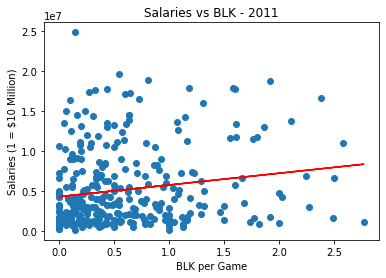

In [144]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = blk_2011['BLK']
y_values = blk_2011['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs BLK - 2011')
plt.xlabel('BLK per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between BLK per Game and Salary
correlation = st.pearsonr(blk_2011['BLK'], blk_2011['Salaries'])
blk2011_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [145]:
#BLK to Salary Analysis
namegroup_2012 = salarystats_2012.groupby(["Name","Salaries"])
#Create BLK DF
blk_2012 = namegroup_2012["BLK"].mean().reset_index(name='BLK')
# Pull Top 5 Salaries & Top 5 BLK for 2012
top5_blk2012 = blk_2012.nlargest(5,['BLK'])
top5_blk2012.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
105,Earl Clark,"$1,160,000.00",4.00
298,Serge Ibaka,"$1,288,200.00",3.65
128,Greg Stiemsma,"$762,195.00",2.67
20,Anthony Randolph,"$2,911,231.00",2.60
139,JaVale McGee,"$2,462,400.00",2.36


In [146]:
#Top 5 player Salaries for that year
top5_salary2012 = blk_2012.nlargest(5,['Salaries'])
top5_salary2012.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
203,Kobe Bryant,"$25,244,493.00",0.31
333,Vince Carter,"$21,300,000.00",0.35
196,Kevin Garnett,"$21,247,044.00",1.02
317,Tim Duncan,"$21,164,619.00",1.52
274,Rashard Lewis,"$21,136,631.00",0.27


Correlation Coefficient: 0.12


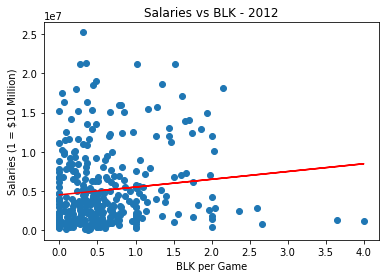

In [147]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = blk_2012['BLK']
y_values = blk_2012['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs BLK - 2012')
plt.xlabel('BLK per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between BLK per Game and Salary
correlation = st.pearsonr(blk_2012['BLK'], blk_2012['Salaries'])
blk2012_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [148]:
#BLK to Salary Analysis
namegroup_2013 = salarystats_2013.groupby(["Name","Salaries"])
#Create BLK DF
blk_2013 = namegroup_2013["BLK"].mean().reset_index(name='BLK')
# Pull Top 5 Salaries & Top 5 BLK for 2013
top5_blk2013 = blk_2013.nlargest(5,['BLK'])
top5_blk2013.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
304,Taj Gibson,"$2,155,811.00",3.20
291,Serge Ibaka,"$2,253,061.00",3.02
215,Larry Sanders,"$1,991,760.00",2.76
310,Tim Duncan,"$9,638,554.00",2.65
282,Roy Hibbert,"$13,668,750.00",2.61


In [149]:
#Top 5 player Salaries for that year
top5_salary2013 = blk_2013.nlargest(5,['Salaries'])
top5_salary2013.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
200,Kobe Bryant,"$27,849,000.00",0.32
36,Brandon Roy,"$21,459,805.00",0.00
92,Dirk Nowitzki,"$20,907,128.00",0.70
167,Joe Johnson,"$19,752,645.00",0.19
44,Carmelo Anthony,"$19,450,000.00",0.48


Correlation Coefficient: 0.22


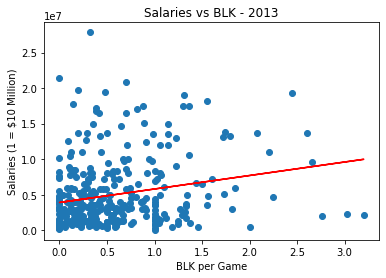

In [150]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = blk_2013['BLK']
y_values = blk_2013['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs BLK - 2013')
plt.xlabel('BLK per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between BLK per Game and Salary
correlation = st.pearsonr(blk_2013['BLK'], blk_2013['Salaries'])
blk2013_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [151]:
#BLK to Salary Analysis
namegroup_2014 = salarystats_2014.groupby(["Name","Salaries"])
#Create BLK DF
blk_2014 = namegroup_2014["BLK"].mean().reset_index(name='BLK')
# Pull Top 5 Salaries & Top 5 BLK for 2014
top5_blk2014 = blk_2014.nlargest(5,['BLK'])
top5_blk2014.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
58,Cole Aldrich,"$884,293.00",4.00
22,Anthony Davis,"$5,375,760.00",2.86
151,Jeff Withey,"$490,180.00",2.75
284,Serge Ibaka,"$12,250,000.00",2.70
277,Ronny Turiaf,"$1,600,000.00",2.50


In [152]:
#Top 5 player Salaries for that year
top5_salary2014 = blk_2014.nlargest(5,['Salaries'])
top5_salary2014.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
191,Kobe Bryant,"$30,453,000.00",0.17
84,Dirk Nowitzki,"$22,721,381.00",0.56
45,Carmelo Anthony,"$21,490,000.00",0.66
160,Joe Johnson,"$21,466,718.00",0.13
89,Dwight Howard,"$20,513,178.00",1.80


Correlation Coefficient: 0.07


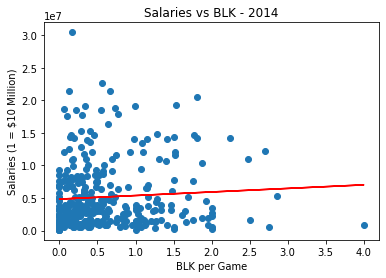

In [153]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = blk_2014['BLK']
y_values = blk_2014['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs BLK - 2014')
plt.xlabel('BLK per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between BLK per Game and Salary
correlation = st.pearsonr(blk_2014['BLK'], blk_2014['Salaries'])
blk2014_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [154]:
#BLK to Salary Analysis
namegroup_2015 = salarystats_2015.groupby(["Name","Salaries"])
#Create BLK DF
blk_2015 = namegroup_2015["BLK"].mean().reset_index(name='BLK')
# Pull Top 5 Salaries & Top 5 BLK for 2015
top5_blk2015 = blk_2015.nlargest(5,['BLK'])
top5_blk2015.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
22,Anthony Davis,"$5,607,240.00",2.94
298,Rudy Gobert,"$1,127,400.00",2.84
176,John Henson,"$1,987,320.00",2.64
39,Brandan Wright,"$5,000,000.00",2.57
132,Hassan Whiteside,"$775,191.00",2.53


In [155]:
#Top 5 player Salaries for that year
top5_salary2015 = blk_2015.nlargest(5,['Salaries'])
top5_salary2015.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
208,Kobe Bryant,"$23,500,000.00",0.20
172,Joe Johnson,"$23,180,790.00",0.17
52,Carmelo Anthony,"$22,458,401.00",0.42
100,Dwight Howard,"$21,436,271.00",1.29
59,Chris Bosh,"$20,644,400.00",0.57


Correlation Coefficient: 0.13


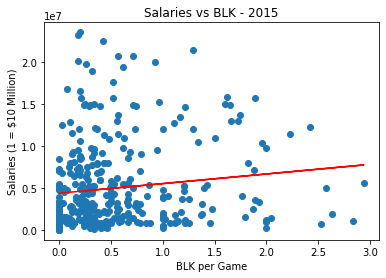

In [156]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = blk_2015['BLK']
y_values = blk_2015['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs BLK - 2015')
plt.xlabel('BLK per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between BLK per Game and Salary
correlation = st.pearsonr(blk_2015['BLK'], blk_2015['Salaries'])
blk2015_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [157]:
#BLK to Salary Analysis
namegroup_2016 = salarystats_2016.groupby(["Name","Salaries"])
#Create BLK DF
blk_2016 = namegroup_2016["BLK"].mean().reset_index(name='BLK')
# Pull Top 5 Salaries & Top 5 BLK for 2016
top5_blk2016 = blk_2016.nlargest(5,['BLK'])
top5_blk2016.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
165,John Henson,"$2,943,220.00",4.00
122,Hassan Whiteside,"$981,348.00",3.81
221,Lucas Nogueira,"$1,842,000.00",3.00
347,Willie Reed,"$525,093.00",3.00
135,JaVale McGee,"$13,270,964.00",2.50


In [158]:
#Top 5 player Salaries for that year
top5_salary2016 = blk_2016.nlargest(5,['Salaries'])
top5_salary2016.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
203,Kobe Bryant,"$25,000,000.00",0.20
219,LeBron James,"$22,970,500.00",0.64
48,Carmelo Anthony,"$22,875,000.00",0.53
95,Dwight Howard,"$22,359,364.00",1.59
163,Joe Johnson,"$22,309,344.00",0.05


Correlation Coefficient: 0.09


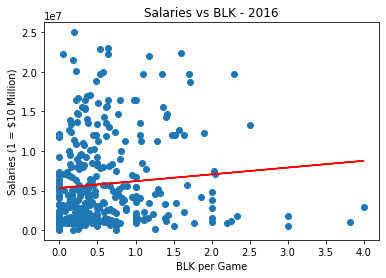

In [159]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = blk_2016['BLK']
y_values = blk_2016['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs BLK - 2016')
plt.xlabel('BLK per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between BLK per Game and Salary
correlation = st.pearsonr(blk_2016['BLK'], blk_2016['Salaries'])
blk2016_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [160]:
#BLK to Salary Analysis
namegroup_2017 = salarystats_2017.groupby(["Name","Salaries"])
#Create BLK DF
blk_2017 = namegroup_2017["BLK"].mean().reset_index(name='BLK')
# Pull Top 5 Salaries & Top 5 BLK for 2017
top5_blk2017 = blk_2017.nlargest(5,['BLK'])
top5_blk2017.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
278,Rudy Gobert,"$2,121,287.00",2.64
148,Joel Embiid,"$4,826,160.00",2.45
17,Anthony Davis,"$22,116,750.00",2.23
233,Myles Turner,"$2,380,440.00",2.12
106,Hassan Whiteside,"$22,116,750.00",2.09


In [161]:
#Top 5 player Salaries for that year
top5_salary2017 = blk_2017.nlargest(5,['Salaries'])
top5_salary2017.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
196,LeBron James,"$30,963,450.00",0.59
1,Al Horford,"$26,540,100.00",1.26
67,DeMar DeRozan,"$26,540,100.00",0.18
125,James Harden,"$26,540,100.00",0.47
176,Kevin Durant,"$26,540,100.00",1.60


Correlation Coefficient: 0.14


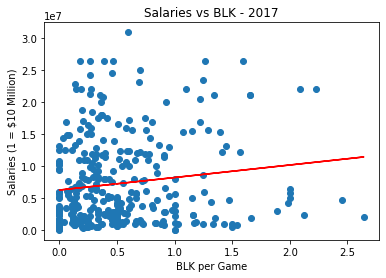

In [162]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = blk_2017['BLK']
y_values = blk_2017['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs BLK - 2017')
plt.xlabel('BLK per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between BLK per Game and Salary
correlation = st.pearsonr(blk_2017['BLK'], blk_2017['Salaries'])
blk2017_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [163]:
#BLK to Salary Analysis
namegroup_2018 = salarystats_2018.groupby(["Name","Salaries"])
#Create BLK DF
blk_2018 = namegroup_2018["BLK"].mean().reset_index(name='BLK')
# Pull Top 5 Salaries & Top 5 BLK for 2018
top5_blk2018 = blk_2018.nlargest(5,['BLK'])
top5_blk2018.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
103,Ekpe Udoh,"$3,200,000.00",3.00
20,Anthony Davis,"$23,775,506.00",2.57
209,Kristaps Porzingis,"$4,503,600.00",2.40
301,Rudy Gobert,"$21,224,719.00",2.30
5,Al Jefferson,"$9,769,821.00",2.00


In [164]:
#Top 5 player Salaries for that year
top5_salary2018 = blk_2018.nlargest(5,['Salaries'])
top5_salary2018.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
319,Stephen Curry,"$34,682,550.00",0.16
222,LeBron James,"$33,285,709.00",0.87
279,Paul Millsap,"$30,769,231.00",1.14
125,Gordon Hayward,"$29,727,900.00",0.00
30,Blake Griffin,"$29,512,900.00",0.31


Correlation Coefficient: 0.13


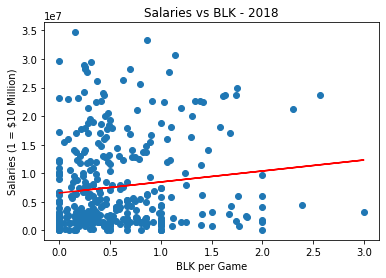

In [165]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = blk_2018['BLK']
y_values = blk_2018['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs BLK - 2018')
plt.xlabel('BLK per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between BLK per Game and Salary
correlation = st.pearsonr(blk_2018['BLK'], blk_2018['Salaries'])
blk2018_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [166]:
#BLK to Salary Analysis
namegroup_2019 = salarystats_2019.groupby(["Name","Salaries"])
#Create BLK DF
blk_2019 = namegroup_2019["BLK"].mean().reset_index(name='BLK')
# Pull Top 5 Salaries & Top 5 BLK for 2019
top5_blk2019 = blk_2019.nlargest(5,['BLK'])
top5_blk2019.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
99,Ekpe Udoh,"$3,360,000.00",4.00
250,Nerlens Noel,"$1,757,429.00",3.00
248,Myles Turner,"$3,294,994.00",2.69
18,Anthony Davis,"$25,434,263.00",2.41
282,Rudy Gobert,"$22,741,573.00",2.29


In [167]:
#Top 5 player Salaries for that year
top5_salary2019 = blk_2019.nlargest(5,['Salaries'])
top5_salary2019.style.format({"Salaries":"${:,.2f}" , "BLK":"{:,.2f}"})

,Name,Salaries,BLK
300,Stephen Curry,"$37,457,154.00",0.36
283,Russell Westbrook,"$35,665,000.00",0.45
48,Chris Paul,"$35,654,150.00",0.31
216,LeBron James,"$35,654,150.00",0.60
26,Blake Griffin,"$31,873,932.00",0.37


Correlation Coefficient: 0.1


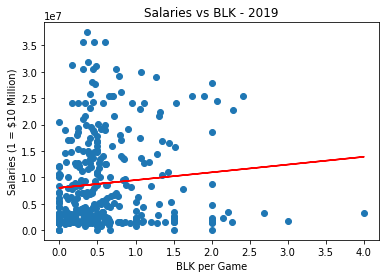

In [168]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = blk_2019['BLK']
y_values = blk_2019['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs BLK - 2019')
plt.xlabel('BLK per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between BLK per Game and Salary
correlation = st.pearsonr(blk_2019['BLK'], blk_2019['Salaries'])
blk2019_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

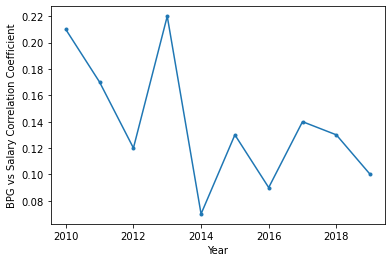

In [169]:
x_axis =[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y_axis = [.21,.17,.12,.22,.07,.13,.09,.14,.13,.10]
plt.plot(x_axis,y_axis, marker= '.')

plt.xlabel("Year")
plt.ylabel("BPG vs Salary Correlation Coefficient")
plt.show()

In [170]:
#####SSSSS#####
#####TTTTT#####
#####EEEEE#####
#####AAAAA#####
#####LLLLL#####
#####SSSSS#####

In [171]:
#STL to Salary Analysis
namegroup_2010 = salarystats_2010.groupby(["Name","Salaries"])
#CreateSTL DF
stl_2010 = namegroup_2010["STL"].mean().reset_index(name='STL')
# Pull Top 5 Salaries & Top 5 BLK for 2010
top5_stl2010 = stl_2010.nlargest(5,['STL'])
top5_stl2010.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
212,Marcus Williams,"$855,189.00",4.00
251,Rajon Rondo,"$2,094,922.00",2.33
233,Monta Ellis,"$11,000,000.00",2.23
62,Chris Paul,"$13,520,500.00",2.13
133,Jamario Moon,"$2,750,000.00",2.00


In [172]:
#Top 5 player Salaries for that year
top5_salary2010 = stl_2010.nlargest(5,['Salaries'])
top5_salary2010.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
307,Tracy McGrady,"$23,239,562.00",0.62
192,Kobe Bryant,"$23,034,375.00",1.55
158,Jermaine O'Neal,"$23,016,000.00",0.36
302,Tim Duncan,"$22,183,220.00",0.58
285,Shaquille O'Neal,"$20,000,000.00",0.28


Correlation Coefficient: 0.15


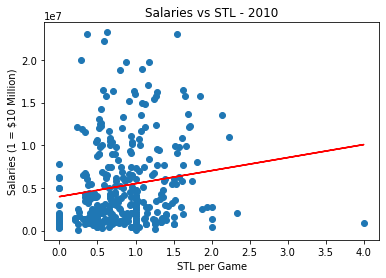

In [173]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = stl_2010['STL']
y_values = stl_2010['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs STL - 2010')
plt.xlabel('STL per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between STL per Game and Salary
correlation = st.pearsonr(stl_2010['STL'], stl_2010['Salaries'])
stl20190_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [174]:
#STL to Salary Analysis
namegroup_2011 = salarystats_2011.groupby(["Name","Salaries"])
#CreateSTL DF
stl_2011 = namegroup_2011["STL"].mean().reset_index(name='STL')
# Pull Top 5 Salaries & Top 5 BLK for 2010=1
top5_stl2011 = stl_2011.nlargest(5,['STL'])
top5_stl2011.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
60,Chris Paul,"$14,940,153.00",2.35
302,Tony Allen,"$3,000,000.00",2.26
252,Rajon Rondo,"$9,090,911.00",2.25
139,Jared Dudley,"$2,151,068.00",2.13
233,Monta Ellis,"$11,000,000.00",2.10


In [175]:
#Top 5 player Salaries for that year
top5_salary2011 = stl_2011.nlargest(5,['Salaries'])
top5_salary2011.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
192,Kobe Bryant,"$24,806,250.00",1.21
255,Rashard Lewis,"$19,573,711.00",0.98
186,Kevin Garnett,"$18,800,000.00",1.34
299,Tim Duncan,"$18,700,000.00",0.66
15,Andrei Kirilenko,"$17,823,000.00",1.27


Correlation Coefficient: 0.21


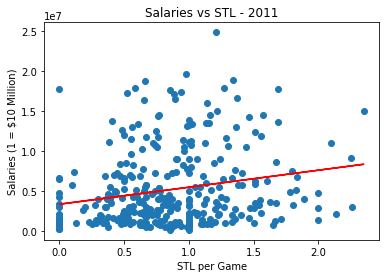

In [176]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = stl_2011['STL']
y_values = stl_2011['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs STL - 2011')
plt.xlabel('STL per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between STL per Game and Salary
correlation = st.pearsonr(stl_2011['STL'], stl_2011['Salaries'])
stl2011_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [177]:
#STL to Salary Analysis
namegroup_2012 = salarystats_2012.groupby(["Name","Salaries"])
#CreateSTL DF
stl_2012 = namegroup_2012["STL"].mean().reset_index(name='STL')
# Pull Top 5 Salaries & Top 5 BLK for 2012
top5_stl2012 = stl_2012.nlargest(5,['STL'])
top5_stl2012.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
222,Luke Harangody,"$762,195.00",3.00
53,Chris Paul,"$16,359,805.00",2.53
261,Omer Asik,"$1,857,500.00",2.50
281,Ricky Rubio,"$3,480,120.00",2.42
116,Francisco Garcia,"$5,800,000.00",2.33


In [178]:
#Top 5 player Salaries for that year
top5_salary2012 = stl_2012.nlargest(5,['Salaries'])
top5_salary2012.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
203,Kobe Bryant,"$25,244,493.00",1.19
333,Vince Carter,"$21,300,000.00",1.00
196,Kevin Garnett,"$21,247,044.00",0.93
317,Tim Duncan,"$21,164,619.00",0.66
274,Rashard Lewis,"$21,136,631.00",0.80


Correlation Coefficient: 0.15


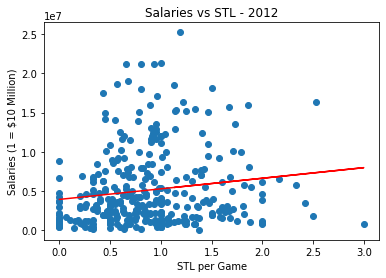

In [179]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = stl_2012['STL']
y_values = stl_2012['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs STL - 2012')
plt.xlabel('STL per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between STL per Game and Salary
correlation = st.pearsonr(stl_2012['STL'], stl_2012['Salaries'])
stl2012_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [180]:
#STL to Salary Analysis
namegroup_2013 = salarystats_2013.groupby(["Name","Salaries"])
#CreateSTL DF
stl_2013 = namegroup_2013["STL"].mean().reset_index(name='STL')
# Pull Top 5 Salaries & Top 5 BLK for 2013
top5_stl2013 = stl_2013.nlargest(5,['STL'])
top5_stl2013.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
49,Chase Budinger,"$942,293.00",3.00
211,Lamar Odom,"$8,200,000.00",3.00
277,Ricky Rubio,"$3,741,120.00",2.62
109,Eric Bledsoe,"$1,707,720.00",2.50
55,Chris Paul,"$17,779,457.00",2.41


In [181]:
#Top 5 player Salaries for that year
top5_salary2013 = stl_2013.nlargest(5,['Salaries'])
top5_salary2013.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
200,Kobe Bryant,"$27,849,000.00",1.36
36,Brandon Roy,"$21,459,805.00",0.60
92,Dirk Nowitzki,"$20,907,128.00",0.77
167,Joe Johnson,"$19,752,645.00",0.68
44,Carmelo Anthony,"$19,450,000.00",0.78


Correlation Coefficient: 0.14


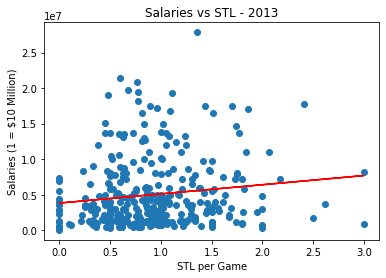

In [182]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = stl_2013['STL']
y_values = stl_2013['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs STL - 2013')
plt.xlabel('STL per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between STL per Game and Salary
correlation = st.pearsonr(stl_2013['STL'], stl_2013['Salaries'])
stl2013_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [183]:
#STL to Salary Analysis
namegroup_2014 = salarystats_2014.groupby(["Name","Salaries"])
#CreateSTL DF
stl_2014 = namegroup_2014["STL"].mean().reset_index(name='STL')
# Pull Top 5 Salaries & Top 5 BLK for 2014
top5_stl2014 = stl_2014.nlargest(5,['STL'])
top5_stl2014.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
239,Nick Calathes,"$490,180.00",2.57
55,Chris Paul,"$18,668,431.00",2.48
270,Ricky Rubio,"$4,002,120.00",2.33
109,Gerald Wallace,"$10,105,855.00",2.19
303,Thaddeus Young,"$8,600,000.00",2.13


In [184]:
#Top 5 player Salaries for that year
top5_salary2014 = stl_2014.nlargest(5,['Salaries'])
top5_salary2014.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
191,Kobe Bryant,"$30,453,000.00",1.17
84,Dirk Nowitzki,"$22,721,381.00",0.91
45,Carmelo Anthony,"$21,490,000.00",1.23
160,Joe Johnson,"$21,466,718.00",0.59
89,Dwight Howard,"$20,513,178.00",0.85


Correlation Coefficient: 0.14


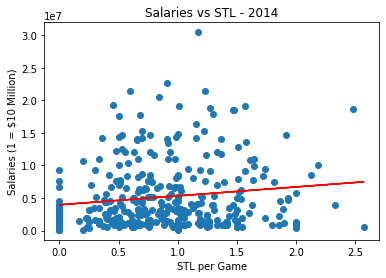

In [185]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = stl_2014['STL']
y_values = stl_2014['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs STL - 2014')
plt.xlabel('STL per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between STL per Game and Salary
correlation = st.pearsonr(stl_2014['STL'], stl_2014['Salaries'])
stl2014_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [186]:
#STL to Salary Analysis
namegroup_2015 = salarystats_2015.groupby(["Name","Salaries"])
#CreateSTL DF
stl_2015 = namegroup_2015["STL"].mean().reset_index(name='STL')
# Pull Top 5 Salaries & Top 5 BLK for 2015
top5_stl2015 = stl_2015.nlargest(5,['STL'])
top5_stl2015.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
304,Sebastian Telfair,"$1,316,809.00",4.00
210,Kostas Papanikolaou,"$4,797,664.00",3.00
315,Spencer Dinwiddie,"$700,000.00",3.00
344,Tyler Johnson,"$280,526.00",2.50
193,Kawhi Leonard,"$3,053,368.00",2.31


In [187]:
#Top 5 player Salaries for that year
top5_salary2015 = stl_2015.nlargest(5,['Salaries'])
top5_salary2015.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
208,Kobe Bryant,"$23,500,000.00",1.34
172,Joe Johnson,"$23,180,790.00",0.74
52,Carmelo Anthony,"$22,458,401.00",1.00
100,Dwight Howard,"$21,436,271.00",0.68
59,Chris Bosh,"$20,644,400.00",0.93


Correlation Coefficient: 0.08


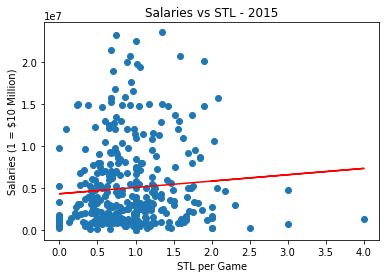

In [188]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = stl_2015['STL']
y_values = stl_2015['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs STL - 2015')
plt.xlabel('STL per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between STL per Game and Salary
correlation = st.pearsonr(stl_2015['STL'], stl_2015['Salaries'])
stl2015_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [189]:
#STL to Salary Analysis
namegroup_2016 = salarystats_2016.groupby(["Name","Salaries"])
#CreateSTL DF
stl_2016 = namegroup_2016["STL"].mean().reset_index(name='STL')
# Pull Top 5 Salaries & Top 5 BLK for 2016
top5_stl2016 = stl_2016.nlargest(5,['STL'])
top5_stl2016.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
162,Joe Ingles,"$2,100,000.00",3.00
322,Tim Frazier,"$989,216.00",2.50
63,Cole Aldrich,"$1,100,602.00",2.40
185,Jusuf Nurkic,"$1,842,000.00",2.33
268,Pablo Prigioni,"$1,421,348.00",2.33


In [190]:
#Top 5 player Salaries for that year
top5_salary2016 = stl_2016.nlargest(5,['Salaries'])
top5_salary2016.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
203,Kobe Bryant,"$25,000,000.00",0.94
219,LeBron James,"$22,970,500.00",1.37
48,Carmelo Anthony,"$22,875,000.00",0.86
95,Dwight Howard,"$22,359,364.00",0.97
163,Joe Johnson,"$22,309,344.00",0.75


Correlation Coefficient: 0.16


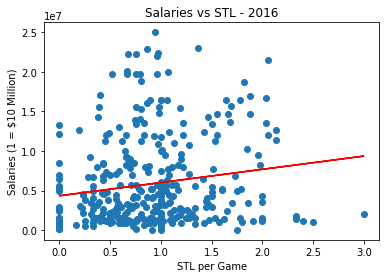

In [191]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = stl_2016['STL']
y_values = stl_2016['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs STL - 2016')
plt.xlabel('STL per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between STL per Game and Salary
correlation = st.pearsonr(stl_2016['STL'], stl_2016['Salaries'])
stl2016_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [192]:
#STL to Salary Analysis
namegroup_2017 = salarystats_2017.groupby(["Name","Salaries"])
#CreateSTL DF
stl_2017 = namegroup_2017["STL"].mean().reset_index(name='STL')
# Pull Top 5 Salaries & Top 5 BLK for 2017
top5_stl2017 = stl_2017.nlargest(5,['STL'])
top5_stl2017.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
206,Marcelo Huertas,"$1,500,000.00",5.00
234,Nemanja Bjelica,"$3,800,000.00",3.00
208,Marcus Smart,"$3,578,880.00",2.58
128,James Michael McAdoo,"$980,431.00",2.50
166,Justin Holiday,"$1,015,696.00",2.50


In [193]:
#Top 5 player Salaries for that year
top5_salary2017 = stl_2017.nlargest(5,['Salaries'])
top5_salary2017.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
196,LeBron James,"$30,963,450.00",1.24
1,Al Horford,"$26,540,100.00",0.76
67,DeMar DeRozan,"$26,540,100.00",1.05
125,James Harden,"$26,540,100.00",1.49
176,Kevin Durant,"$26,540,100.00",1.06


Correlation Coefficient: 0.12


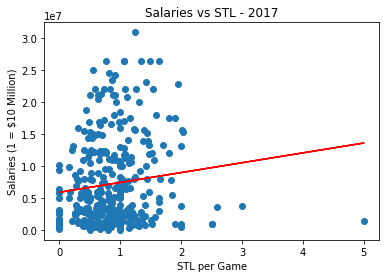

In [194]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = stl_2017['STL']
y_values = stl_2017['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs STL - 2017')
plt.xlabel('STL per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between STL per Game and Salary
correlation = st.pearsonr(stl_2017['STL'], stl_2017['Salaries'])
stl2017_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [195]:
#STL to Salary Analysis
namegroup_2018 = salarystats_2018.groupby(["Name","Salaries"])
#CreateSTL DF
stl_2018 = namegroup_2018["STL"].mean().reset_index(name='STL')
# Pull Top 5 Salaries & Top 5 BLK for 2018
top5_stl2018 = stl_2018.nlargest(5,['STL'])
top5_stl2018.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
355,Tyus Jones,"$1,471,382.00",2.91
103,Ekpe Udoh,"$3,200,000.00",2.67
110,Eric Moreland,"$1,740,000.00",2.67
328,Thabo Sefolosha,"$5,250,000.00",2.50
356,Victor Oladipo,"$21,000,000.00",2.36


In [196]:
#Top 5 player Salaries for that year
top5_salary2018 = stl_2018.nlargest(5,['Salaries'])
top5_salary2018.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
319,Stephen Curry,"$34,682,550.00",1.57
222,LeBron James,"$33,285,709.00",1.41
279,Paul Millsap,"$30,769,231.00",1.03
125,Gordon Hayward,"$29,727,900.00",0.00
30,Blake Griffin,"$29,512,900.00",0.69


Correlation Coefficient: 0.13


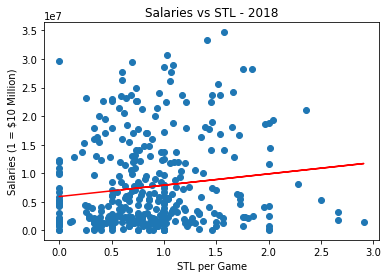

In [197]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = stl_2018['STL']
y_values = stl_2018['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs STL - 2018')
plt.xlabel('STL per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between STL per Game and Salary
correlation = st.pearsonr(stl_2018['STL'], stl_2018['Salaries'])
stl2018_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

In [198]:
#STL to Salary Analysis
namegroup_2019 = salarystats_2019.groupby(["Name","Salaries"])
#CreateSTL DF
stl_2019 = namegroup_2019["STL"].mean().reset_index(name='STL')
# Pull Top 5 Salaries & Top 5 BLK for 2019
top5_stl2019 = stl_2019.nlargest(5,['STL'])
top5_stl2019.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
295,Sindarius Thornwell,"$1,378,242.00",5.00
139,Jacob Evans,"$1,646,400.00",3.00
53,Cory Joseph,"$7,945,000.00",2.56
250,Nerlens Noel,"$1,757,429.00",2.50
260,Pat Connaughton,"$1,641,000.00",2.50


In [199]:
#Top 5 player Salaries for that year
top5_salary2019 = stl_2019.nlargest(5,['Salaries'])
top5_salary2019.style.format({"Salaries":"${:,.2f}" , "STL":"{:,.2f}"})

,Name,Salaries,STL
300,Stephen Curry,"$37,457,154.00",1.33
283,Russell Westbrook,"$35,665,000.00",1.95
48,Chris Paul,"$35,654,150.00",1.97
216,LeBron James,"$35,654,150.00",1.31
26,Blake Griffin,"$31,873,932.00",0.69


Correlation Coefficient: 0.16


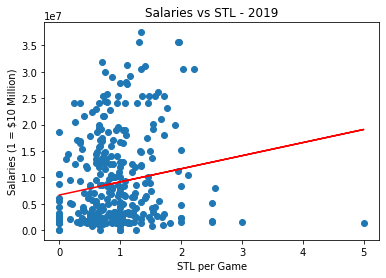

In [200]:
# Plot the linear regression model on top of the previous scatter plot

#Define X & Y values
x_values = stl_2019['STL']
y_values = stl_2019['Salaries']
#Setup Scatter & Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#Plot Scatter & Linear Regression
plt.title('Salaries vs STL - 2019')
plt.xlabel('STL per Game')
plt.ylabel('Salaries (1 = $10 Million)')
#Correlation between STL per Game and Salary
correlation = st.pearsonr(stl_2019['STL'], stl_2019['Salaries'])
stl2019_corr = {round(correlation[0],2)}
print(f"Correlation Coefficient: {round(correlation[0],2)}")
plt.show()

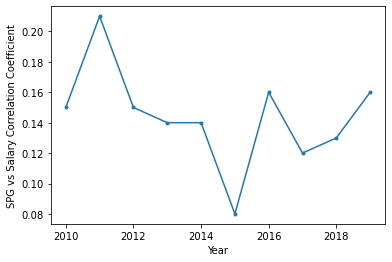

In [201]:
x_axis =[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y_axis = [.15,.21,.15,.14,.14,.08,.16,.12,.13,.16]
plt.plot(x_axis,y_axis, marker= '.')

plt.xlabel("Year")
plt.ylabel("SPG vs Salary Correlation Coefficient")
plt.show()

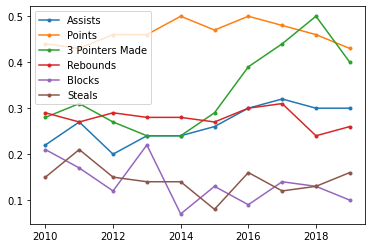

In [217]:
df = pd.DataFrame({
    'Assists': [.22, .27, .2, .24, .24, .26, .30, .32, .3, .3],
    'Points': [.44, .43, .46, .46, .50, .47, .50, .48, .46, .43],
    '3 Pointers Made': [.28,.31,.27,.24,.24,.29,.39,.44,.5,.4],
    'Rebounds': [.29,.27,.29,.28,.28,.27,.30,.31,.24,.26],
    'Blocks': [.21,.17,.12,.22,.07,.13,.09,.14,.13,.10],
    'Steals': [.15,.21,.15,.14,.14,.08,.16,.12,.13,.16]
    }  ,index=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])
lines = df.plot.line(marker= '.')

numpy.ndarray

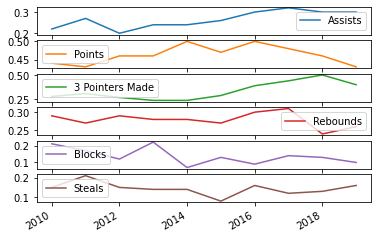

In [206]:
axes = df.plot.line(subplots=True)
type(axes)

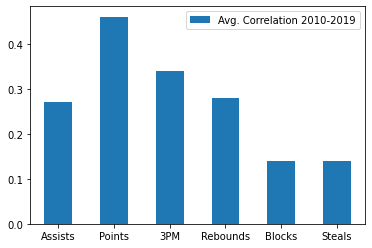

In [216]:
stat_corr_avg = [.27,.46,.34,.28,.14,.14]
index = ['Assists', 'Points', '3PM', 'Rebounds', 'Blocks', 'Steals']
df = pd.DataFrame({'Avg. Correlation 2010-2019': stat_corr_avg}, index=index)
ax = df.plot.bar(rot=0)

### 